# 📊 Analyse des Résultats Électoraux Français

Ce notebook analyse les données d'élections contenues dans `data_election_results.csv`.
Le format ne permettait pas de stocker les informations comme je le souhaitais. Décision => Utiliser chaque fichier de résultat par élection.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Charger les données
df = pd.read_csv('data_election_results.csv', sep=';', low_memory=False)
print(f"✅ Données chargées: {len(df):,} lignes, {len(df.columns)} colonnes")


✅ Données chargées: 27,097,161 lignes, 18 colonnes


## 1. Aperçu des données


In [2]:
# Afficher les premières lignes
print("📋 Aperçu des données:")
df.head(10)


📋 Aperçu des données:


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
0,2019_euro_t1,01001_0001,01,1,0001,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,13.0,2.16,4.14,NaN,NaN,NaN,NaN,NaN,NaN
1,2019_euro_t1,01002_0001,01,2,0001,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,6.0,2.86,4.44,NaN,NaN,NaN,NaN,NaN,NaN
2,2019_euro_t1,01004_0001,01,4,0001,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,39.0,3.71,8.23,NaN,NaN,NaN,NaN,NaN,NaN
3,2019_euro_t1,01004_0002,01,4,0002,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,42.0,3.80,7.78,NaN,NaN,NaN,NaN,NaN,NaN
4,2019_euro_t1,01004_0003,01,4,0003,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,31.0,2.93,5.63,NaN,NaN,NaN,NaN,NaN,NaN
5,2019_euro_t1,01004_0004,01,4,0004,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,42.0,4.64,9.55,NaN,NaN,NaN,NaN,NaN,NaN
6,2019_euro_t1,01004_0005,01,4,0005,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,43.0,4.40,10.39,NaN,NaN,NaN,NaN,NaN,NaN
7,2019_euro_t1,01004_0006,01,4,0006,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,41.0,4.03,7.85,NaN,NaN,NaN,NaN,NaN,NaN
8,2019_euro_t1,01004_0007,01,4,0007,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,34.0,3.35,6.37,NaN,NaN,NaN,NaN,NaN,NaN
9,2019_euro_t1,01004_0008,01,4,0008,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,35.0,3.58,7.29,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Informations sur les colonnes
print("📊 Informations sur les colonnes:")
print(df.info())
print("\n📈 Statistiques descriptives:")
df.describe()


📊 Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27097161 entries, 0 to 27097160
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_election           object 
 1   id_brut_miom          object 
 2   Code du département   object 
 3   Code de la commune    int64  
 4   Code du b.vote        object 
 5   N°Panneau             float64
 6   Libellé Abrégé Liste  object 
 7   Libellé Etendu Liste  object 
 8   Nom Tête de Liste     object 
 9   Voix                  float64
 10  % Voix/Ins            float64
 11  % Voix/Exp            float64
 12  Sexe                  object 
 13  Nom                   object 
 14  Prénom                object 
 15  Nuance                object 
 16  Binôme                object 
 17  Liste                 object 
dtypes: float64(4), int64(1), object(13)
memory usage: 3.6+ GB
None

📈 Statistiques descriptives:


,Code de la commune,N°Panneau,Voix,% Voix/Ins,% Voix/Exp
count,2.709716e+07,2.416921e+07,2.709716e+07,2.709703e+07,9.883521e+06
mean,2.330286e+02,1.883719e+01,4.491748e+01,7.609895e+00,9.918524e+00
std,1.832102e+02,3.411859e+01,9.410990e+01,1.251487e+01,1.667462e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.100000e+01,5.000000e+00,1.000000e+00,1.200000e-01,0.000000e+00
50%,1.910000e+02,9.000000e+00,9.000000e+00,1.700000e+00,1.520000e+00
75%,3.450000e+02,2.000000e+01,4.700000e+01,9.470000e+00,1.220000e+01
max,9.090000e+02,8.940000e+02,4.494400e+04,2.870000e+02,1.000000e+02


## 2. 🗳️ Toutes les Élections


In [4]:
# Liste de toutes les élections uniques
elections = df['id_election'].unique()
print(f"📅 Nombre d'élections uniques: {len(elections)}")
print("\n🗳️ Liste des élections:")
for i, election in enumerate(sorted(elections), 1):
    count = len(df[df['id_election'] == election])
    print(f"  {i}. {election} ({count:,} entrées)")


📅 Nombre d'élections uniques: 53

🗳️ Liste des élections:
  1. 1999_euro_t1 (1,274,740 entrées)
  2. 2001_cant_t1 (185,631 entrées)
  3. 2001_cant_t2 (43,753 entrées)
  4. 2002_legi_t1 (903,988 entrées)
  5. 2002_legi_t2 (115,929 entrées)
  6. 2002_pres_t1 (1,026,256 entrées)
  7. 2002_pres_t2 (128,282 entrées)
  8. 2004_cant_t1 (198,945 entrées)
  9. 2004_cant_t2 (55,289 entrées)
  10. 2004_euro_t1 (1,408,140 entrées)
  11. 2004_regi_t1 (503,807 entrées)
  12. 2007_legi_t1 (861,595 entrées)
  13. 2007_legi_t2 (103,694 entrées)
  14. 2007_pres_t1 (787,404 entrées)
  15. 2007_pres_t2 (131,234 entrées)
  16. 2008_cant_t1 (141,209 entrées)
  17. 2008_cant_t2 (37,193 entrées)
  18. 2008_muni_t1 (109,983 entrées)
  19. 2008_muni_t2 (30,545 entrées)
  20. 2009_euro_t1 (1,379,284 entrées)
  21. 2010_regi_t1 (655,307 entrées)
  22. 2010_regi_t2 (177,390 entrées)
  23. 2011_cant_t1 (173,815 entrées)
  24. 2011_cant_t2 (53,928 entrées)
  25. 2012_legi_t1 (740,266 entrées)
  26. 2012_legi_t2 (128

/var/folders/3x/7jvlgs5d2cn8gft164v1_vx80000gn/T/ipykernel_26882/1136205196.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/political-trends/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


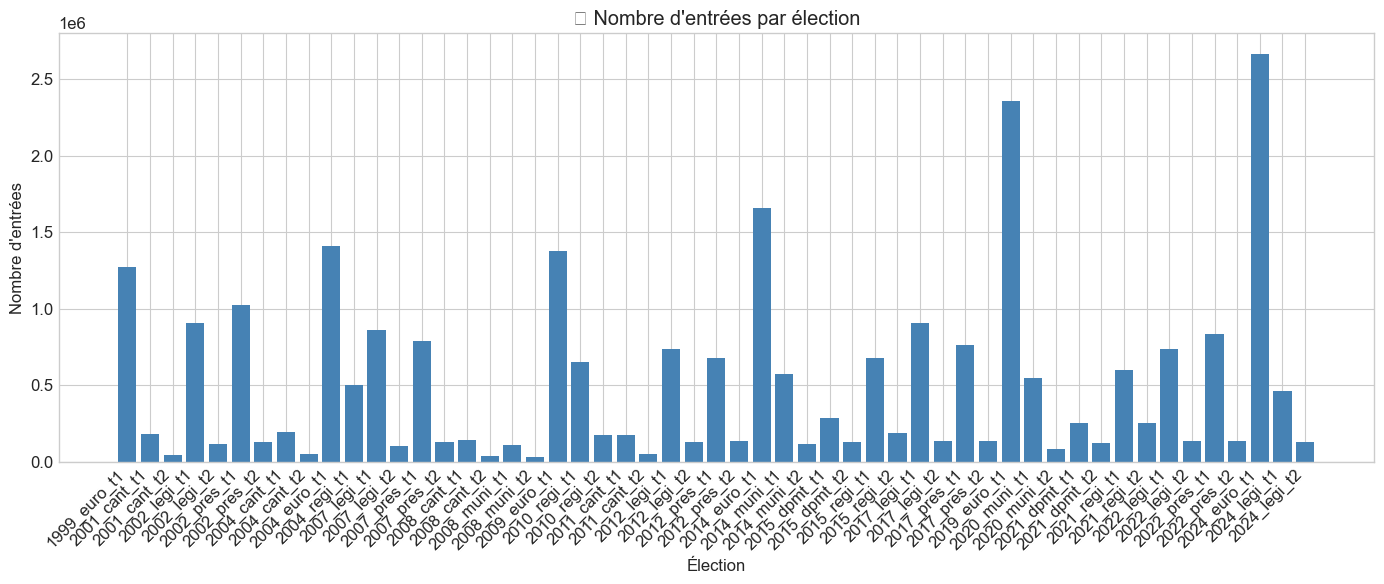

In [5]:
# Visualisation du nombre d'entrées par élection
election_counts = df['id_election'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(range(len(election_counts)), election_counts.values, color='steelblue')
ax.set_xticks(range(len(election_counts)))
ax.set_xticklabels(election_counts.index, rotation=45, ha='right')
ax.set_xlabel('Élection')
ax.set_ylabel("Nombre d'entrées")
ax.set_title("📊 Nombre d'entrées par élection")
plt.tight_layout()
plt.show()


## 3. 🏛️ Tous les Partis / Listes


In [6]:
# Partis (Libellé Abrégé)
parties_short = df['Libellé Abrégé Liste'].dropna().unique()
print(f"🏛️ Nombre de partis (libellé abrégé): {len(parties_short)}")
print("\nListe des partis (abrégé):")
for i, party in enumerate(sorted(parties_short), 1):
    print(f"  {i}. {party}")


🏛️ Nombre de partis (libellé abrégé): 67

Liste des partis (abrégé):
  1. Alliance Jaune
  2. Allons Enfants
  3. Ar
  4. Besoin D'Europe
  5. Changer L'Europe
  6. Debout La France
  7. Defendre Les Enfants
  8. Democratie Representative
  9. Décroissance 2019
  10. Démocratie Représentative
  11. Eac
  12. Ecologie Positive
  13. Ensemble Patriotes
  14. Ensemble Pour Le Frexit
  15. Envie D'Europe
  16. Esperanto
  17. Europe Au Service Peuples
  18. Europe Territoires Écologie
  19. Europe Écologie
  20. Forteresse Europe
  21. France Libre
  22. Free Palestine
  23. Gauche Unie
  24. Humanite Souveraine
  25. Initiative Citoyenne
  26. L'Europe Ca Suffit !
  27. La Droite Pour Faire Entendre La Voix De La France En Europe
  28. La France Fiere, Menee Par Marion Marechal Et Soutenue Par Éric Zemmour
  29. La France Insoumise
  30. La France Revient
  31. La Ligne Claire
  32. La Ruche Citoyenne
  33. Les Européens
  34. Les Oublies De L'Europe
  35. Lfi - Up
  36. Liberté Démocrati

In [7]:
# Partis (Libellé Étendu)
parties_full = df['Libellé Etendu Liste'].dropna().unique()
print(f"🏛️ Nombre de partis (libellé étendu): {len(parties_full)}")
print("\nListe des partis (étendu):")
for i, party in enumerate(sorted(parties_full), 1):
    print(f"  {i}. {party}")


🏛️ Nombre de partis (libellé étendu): 70

Liste des partis (étendu):
  1. "Pour Le Pain, La Paix, La Liberté !" Présentée Par Le Parti Des Travailleurs
  2. Alliance Jaune, La Révolte Par Le Vote
  3. Alliance Rurale
  4. Allons Enfants
  5. Besoin D'Europe
  6. Changer L'Europe
  7. Defendre Les Enfants
  8. Democratie Representative
  9. Décroissance 2019
  10. Démocratie Représentative
  11. Ecologie Positive Et Territoires
  12. Ensemble Patriotes Et Gilets Jaunes : Pour La France, Sortons De L'Union Européenne !
  13. Ensemble Pour Le Frexit
  14. Envie D'Europe Écologique Et Sociale
  15. Esperanto Langue Commune
  16. Espéranto - Langue Commune Équitable Pour L'Europe
  17. Europe Territoires Écologie
  18. Europe Écologie
  19. Forteresse Europe - Liste D'Unite Nationaliste
  20. France Libre
  21. Free Palestine
  22. Gauche Unie Pour Le Monde Du Travail Soutenue Par Fabien Roussel
  23. L'Europe Ca Suffit !
  24. La Droite Pour Faire Entendre La Voix De La France En Europe
  

In [8]:
# Nuances politiques
nuances = df['Nuance'].dropna().unique()
print(f"🎨 Nombre de nuances politiques: {len(nuances)}")
print("\nListe des nuances:")
for i, nuance in enumerate(sorted(nuances), 1):
    count = len(df[df['Nuance'] == nuance])
    print(f"  {i}. {nuance} ({count:,} entrées)")


🎨 Nombre de nuances politiques: 177

Liste des nuances:
  1. 2 (2 entrées)
  2. ALLI (6,228 entrées)
  3. ARTH (67,932 entrées)
  4. AUT (49,058 entrées)
  5. BAYR (197,690 entrées)
  6. BC-COM (18,887 entrées)
  7. BC-DIV (26,413 entrées)
  8. BC-DLF (5,289 entrées)
  9. BC-DSV (2,151 entrées)
  10. BC-DVC (16,429 entrées)
  11. BC-DVD (80,375 entrées)
  12. BC-DVG (66,375 entrées)
  13. BC-ECO (14,377 entrées)
  14. BC-EXD (1,562 entrées)
  15. BC-EXG (4,374 entrées)
  16. BC-FG (30,066 entrées)
  17. BC-FI (5,922 entrées)
  18. BC-FN (101,801 entrées)
  19. BC-GJ (196 entrées)
  20. BC-LR (18,156 entrées)
  21. BC-MDM (2,584 entrées)
  22. BC-PG (375 entrées)
  23. BC-RDG (2,471 entrées)
  24. BC-REG (2,524 entrées)
  25. BC-REM (6,520 entrées)
  26. BC-RN (78,101 entrées)
  27. BC-SOC (64,277 entrées)
  28. BC-UC (6,735 entrées)
  29. BC-UCD (25,564 entrées)
  30. BC-UCG (2,354 entrées)
  31. BC-UD (85,744 entrées)
  32. BC-UDI (7,453 entrées)
  33. BC-UG (57,144 entrées)
  34. BC-

/var/folders/3x/7jvlgs5d2cn8gft164v1_vx80000gn/T/ipykernel_26882/1374854127.py:17: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/political-trends/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


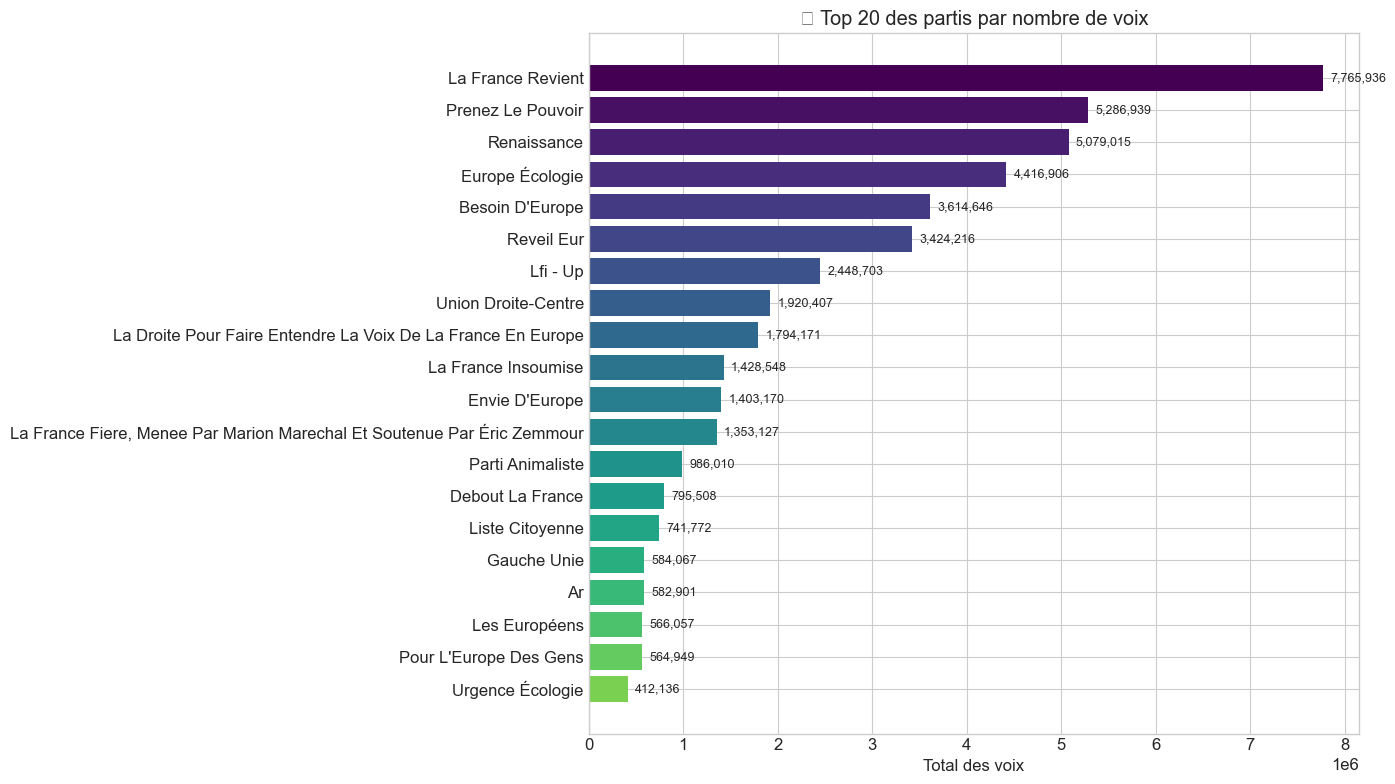

In [9]:
# Top 20 des partis par nombre de voix total
party_votes = df.groupby('Libellé Abrégé Liste')['Voix'].sum().sort_values(ascending=False).head(20)

fig, ax = plt.subplots(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 0.8, len(party_votes)))
bars = ax.barh(range(len(party_votes)), party_votes.values, color=colors)
ax.set_yticks(range(len(party_votes)))
ax.set_yticklabels(party_votes.index)
ax.invert_yaxis()
ax.set_xlabel('Total des voix')
ax.set_title('🏆 Top 20 des partis par nombre de voix')

# Ajouter les valeurs sur les barres
for i, (bar, val) in enumerate(zip(bars, party_votes.values)):
    ax.text(val + max(party_votes.values) * 0.01, i, f'{val:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


## 4. 🏙️ Toutes les Communes / Départements


In [10]:
# Départements
departments = df['Code du département'].dropna().unique()
print(f"🗺️ Nombre de départements: {len(departments)}")
print("\nListe des départements:")
print(sorted(departments))


🗺️ Nombre de départements: 120

Liste des départements:
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '971', '972', '973', '974', '975', '976', '977', '986', '987', '988', '99', 'ZA', 'ZB', 'ZC', 'ZD', 'ZM', 'ZN', 'ZP', 'ZS', 'ZT', 'ZW', 'ZX', 'ZY', 'ZZ']


In [11]:
# Communes
communes = df['Code de la commune'].dropna().unique()
print(f"🏘️ Nombre de communes uniques: {len(communes):,}")

# Nombre de communes par département
communes_per_dept = df.groupby('Code du département')['Code de la commune'].nunique().sort_values(ascending=False)
print(f"\n📊 Communes par département (top 10):")
print(communes_per_dept.head(10))


🏘️ Nombre de communes uniques: 908

📊 Communes par département (top 10):
Code du département
62    895
02    817
80    783
76    746
57    730
14    707
21    707
60    693
27    675
59    653
Name: Code de la commune, dtype: int64


In [12]:
# Bureaux de vote
bureaux = df['Code du b.vote'].dropna().unique()
print(f"🗳️ Nombre de bureaux de vote uniques: {len(bureaux):,}")

# Identifiants uniques (combinaison département/commune/bureau)
id_uniques = df['id_brut_miom'].dropna().unique()
print(f"🔑 Nombre d'identifiants uniques (dept/commune/bureau): {len(id_uniques):,}")


🗳️ Nombre de bureaux de vote uniques: 2,301
🔑 Nombre d'identifiants uniques (dept/commune/bureau): 80,664


/var/folders/3x/7jvlgs5d2cn8gft164v1_vx80000gn/T/ipykernel_26882/155443270.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/political-trends/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


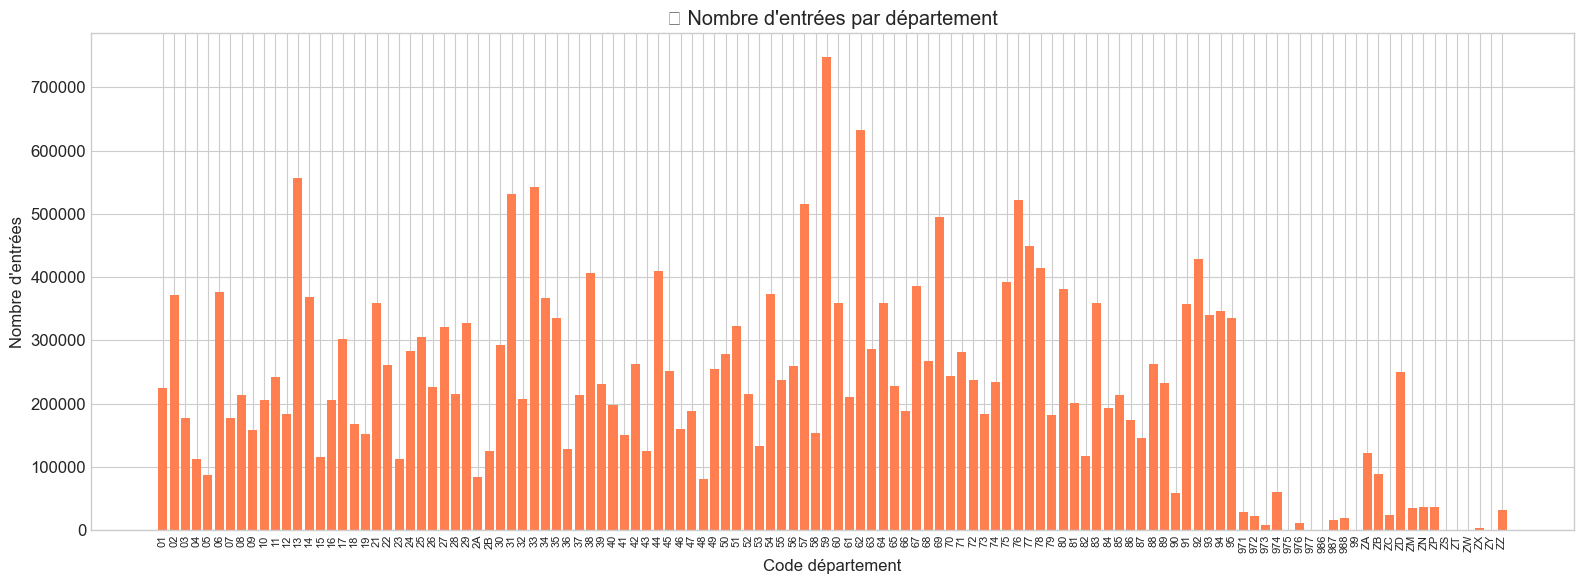

In [13]:
# Visualisation des entrées par département
dept_counts = df['Code du département'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(range(len(dept_counts)), dept_counts.values, color='coral')
ax.set_xticks(range(len(dept_counts)))
ax.set_xticklabels(dept_counts.index, rotation=90, fontsize=8)
ax.set_xlabel('Code département')
ax.set_ylabel("Nombre d'entrées")
ax.set_title("📊 Nombre d'entrées par département")
plt.tight_layout()
plt.show()


## 5. 👤 Têtes de Liste


In [14]:
# Têtes de liste
tetes_liste = df['Nom Tête de Liste'].dropna().unique()
print(f"👤 Nombre de têtes de liste uniques: {len(tetes_liste)}")
print("\nListe des têtes de liste:")
for i, tete in enumerate(sorted(tetes_liste), 1):
    print(f"  {i}. {tete}")


👤 Nombre de têtes de liste uniques: 34

Liste des têtes de liste:
  1. ALEXANDRE Audric
  2. ARTHAUD Nathalie
  3. ASSELINEAU François
  4. AUBRY Manon
  5. AZERGUI Nagib
  6. BARDELLA Jordan
  7. BELLAMY François-Xavier
  8. BIDOU Olivier
  9. BOURG Dominique
  10. BROSSAT Ian
  11. CAILLAUD Sophie
  12. CAMUS Renaud
  13. CHALENÇON Christophe
  14. CORBET Cathy Denise Ginette
  15. DE PREVOISIN Robert
  16. DELFEL Thérèse
  17. DIEUMEGARD Pierre
  18. DUPONT-AIGNAN Nicolas
  19. GERNIGON Yves
  20. GLUCKSMANN Raphaël
  21. HAMON Benoît
  22. HELGEN Gilles
  23. JADOT Yannick
  24. LAGARDE Jean-Christophe
  25. LALANNE Francis
  26. LOISEAU Nathalie
  27. MARIE Florie
  28. PERSON Christian Luc
  29. PHILIPPOT Florian
  30. SANCHEZ Antonio
  31. THOUY Hélène
  32. TOMASINI Nathalie
  33. TRAORÉ Hamada
  34. VAUCLIN Vincent


/var/folders/3x/7jvlgs5d2cn8gft164v1_vx80000gn/T/ipykernel_26882/2236542854.py:12: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/political-trends/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


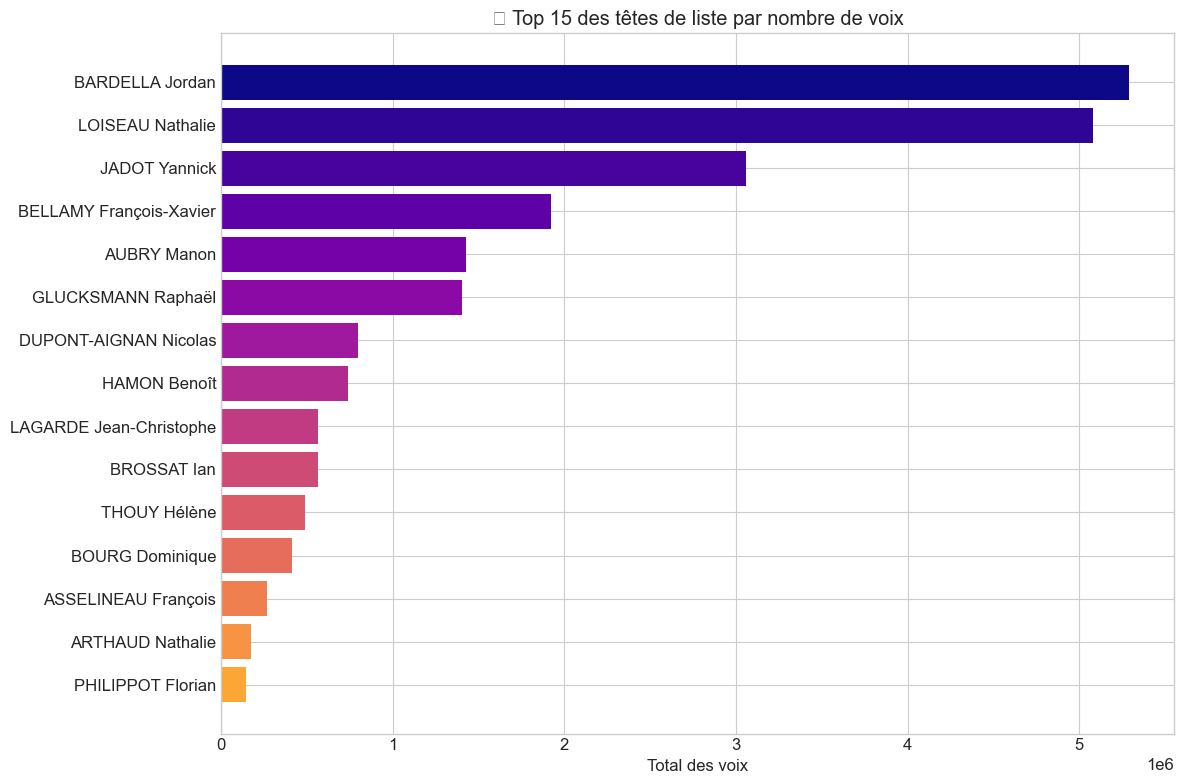

In [15]:
# Total des voix par tête de liste
tete_votes = df.groupby('Nom Tête de Liste')['Voix'].sum().sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.plasma(np.linspace(0, 0.8, len(tete_votes)))
ax.barh(range(len(tete_votes)), tete_votes.values, color=colors)
ax.set_yticks(range(len(tete_votes)))
ax.set_yticklabels(tete_votes.index)
ax.invert_yaxis()
ax.set_xlabel('Total des voix')
ax.set_title('🏆 Top 15 des têtes de liste par nombre de voix')
plt.tight_layout()
plt.show()


## 6. 📈 Analyse par Élection


In [16]:
# Résultats par parti pour chaque élection
def analyze_election(election_id):
    election_df = df[df['id_election'] == election_id]
    results = election_df.groupby('Libellé Abrégé Liste')['Voix'].sum().sort_values(ascending=False)
    total_votes = results.sum()
    
    print(f"\n{'='*60}")
    print(f"🗳️ {election_id}")
    print(f"{'='*60}")
    print(f"Total des voix: {total_votes:,}")
    print(f"Nombre de partis: {len(results)}")
    print(f"\nTop 10 des partis:")
    for i, (party, votes) in enumerate(results.head(10).items(), 1):
        pct = (votes / total_votes) * 100
        print(f"  {i}. {party}: {votes:,} voix ({pct:.2f}%)")
    return results

# Analyser chaque élection
for election in sorted(df['id_election'].unique()):
    analyze_election(election)



🗳️ 1999_euro_t1
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

🗳️ 2001_cant_t1
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

🗳️ 2001_cant_t2
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

🗳️ 2002_legi_t1
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

🗳️ 2002_legi_t2
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

🗳️ 2002_pres_t1
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

🗳️ 2002_pres_t2
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

🗳️ 2004_cant_t1
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

🗳️ 2004_cant_t2
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

🗳️ 2004_euro_t1
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

🗳️ 2004_regi_t1
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

🗳️ 2007_legi_t1
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

🗳️ 2007_legi_t2
Total des voix: 0.0
Nombre de partis: 0

Top 10 des partis:

## 7. 📊 Statistiques Globales


In [17]:
# Résumé complet
print("📊 RÉSUMÉ COMPLET DES DONNÉES")
print("=" * 50)
print(f"📅 Nombre d'élections: {df['id_election'].nunique()}")
print(f"🏛️ Nombre de partis (abrégé): {df['Libellé Abrégé Liste'].nunique()}")
print(f"🏛️ Nombre de partis (étendu): {df['Libellé Etendu Liste'].nunique()}")
print(f"🎨 Nombre de nuances: {df['Nuance'].nunique()}")
print(f"🗺️ Nombre de départements: {df['Code du département'].nunique()}")
print(f"🏘️ Nombre de communes: {df['Code de la commune'].nunique()}")
print(f"🗳️ Nombre de bureaux de vote: {df['id_brut_miom'].nunique()}")
print(f"👤 Nombre de têtes de liste: {df['Nom Tête de Liste'].nunique()}")
print(f"\n📈 Total des voix: {df['Voix'].sum():,.0f}")
print(f"📈 Moyenne des voix par entrée: {df['Voix'].mean():,.2f}")
print(f"📈 Médiane des voix: {df['Voix'].median():,.2f}")


📊 RÉSUMÉ COMPLET DES DONNÉES
📅 Nombre d'élections: 53
🏛️ Nombre de partis (abrégé): 67
🏛️ Nombre de partis (étendu): 70
🎨 Nombre de nuances: 177
🗺️ Nombre de départements: 120
🏘️ Nombre de communes: 908
🗳️ Nombre de bureaux de vote: 80664
👤 Nombre de têtes de liste: 34

📈 Total des voix: 1,217,136,009
📈 Moyenne des voix par entrée: 44.92
📈 Médiane des voix: 9.00


In [18]:
# Valeurs manquantes
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

print("📋 Valeurs manquantes par colonne:")
for col in df.columns:
    if missing[col] > 0:
        print(f"  - {col}: {missing[col]:,} ({missing_pct[col]:.2f}%)")


📋 Valeurs manquantes par colonne:
  - N°Panneau: 2,927,954 (10.81%)
  - Libellé Abrégé Liste: 22,077,111 (81.47%)
  - Libellé Etendu Liste: 22,077,111 (81.47%)
  - Nom Tête de Liste: 24,741,063 (91.31%)
  - Voix: 5 (0.00%)
  - % Voix/Ins: 134 (0.00%)
  - % Voix/Exp: 17,213,640 (63.53%)
  - Sexe: 21,926,122 (80.92%)
  - Nom: 5,822,030 (21.49%)
  - Prénom: 5,822,030 (21.49%)
  - Nuance: 4,231,792 (15.62%)
  - Binôme: 26,295,181 (97.04%)
  - Liste: 27,050,756 (99.83%)


## 8. 💾 Export des données agrégées


In [19]:
# Créer un DataFrame résumé par élection et parti
summary_df = df.groupby(['id_election', 'Libellé Abrégé Liste']).agg({
    'Voix': 'sum',
    '% Voix/Ins': 'mean',
    '% Voix/Exp': 'mean',
    'Code du département': 'nunique',
    'Code de la commune': 'nunique'
}).reset_index()

summary_df.columns = ['Election', 'Parti', 'Total_Voix', 'Moy_Pct_Inscrits', 'Moy_Pct_Exprimes', 'Nb_Departements', 'Nb_Communes']

print("📊 Données agrégées par élection et parti:")
summary_df.head(20)


📊 Données agrégées par élection et parti:


,Election,Parti,Total_Voix,Moy_Pct_Inscrits,Moy_Pct_Exprimes,Nb_Departements,Nb_Communes
0,2019_euro_t1,Alliance Jaune,121209.0,0.291154,0.576395,107,908
1,2019_euro_t1,Allons Enfants,8062.0,0.016185,0.031778,107,908
2,2019_euro_t1,Debout La France,795508.0,1.978990,3.882431,107,908
3,2019_euro_t1,Décroissance 2019,10352.0,0.026555,0.051240,107,908
4,2019_euro_t1,Démocratie Représentative,3084.0,0.005112,0.013353,107,908
5,2019_euro_t1,Ensemble Patriotes,147140.0,0.361587,0.741322,107,908
6,2019_euro_t1,Ensemble Pour Le Frexit,265469.0,0.586210,1.221367,107,908
7,2019_euro_t1,Envie D'Europe,1403170.0,2.961732,5.885000,107,908
8,2019_euro_t1,Esperanto,18587.0,0.044492,0.089055,107,908
9,2019_euro_t1,Europe Au Service Peuples,28469.0,0.043479,0.118948,107,908


In [20]:
# Sauvegarder le résumé
# summary_df.to_csv('election_summary.csv', index=False, sep=';')
# print("✅ Résumé sauvegardé dans 'election_summary.csv'")


In [21]:
# Afficher 10 lignes de données pour chaque élection
print("📊 Échantillon de 10 lignes par élection:\n")

for election in elections:
    print(f"\n{'='*80}")
    print(f"🗳️  {election}")
    print('='*80)
    election_data = df[df['id_election'] == election].head(10)
    display(election_data)


📊 Échantillon de 10 lignes par élection:


🗳️  2019_euro_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
0,2019_euro_t1,01001_0001,01,1,0001,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,13.0,2.16,4.14,NaN,NaN,NaN,NaN,NaN,NaN
1,2019_euro_t1,01002_0001,01,2,0001,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,6.0,2.86,4.44,NaN,NaN,NaN,NaN,NaN,NaN
2,2019_euro_t1,01004_0001,01,4,0001,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,39.0,3.71,8.23,NaN,NaN,NaN,NaN,NaN,NaN
3,2019_euro_t1,01004_0002,01,4,0002,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,42.0,3.80,7.78,NaN,NaN,NaN,NaN,NaN,NaN
4,2019_euro_t1,01004_0003,01,4,0003,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,31.0,2.93,5.63,NaN,NaN,NaN,NaN,NaN,NaN
5,2019_euro_t1,01004_0004,01,4,0004,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,42.0,4.64,9.55,NaN,NaN,NaN,NaN,NaN,NaN
6,2019_euro_t1,01004_0005,01,4,0005,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,43.0,4.40,10.39,NaN,NaN,NaN,NaN,NaN,NaN
7,2019_euro_t1,01004_0006,01,4,0006,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,41.0,4.03,7.85,NaN,NaN,NaN,NaN,NaN,NaN
8,2019_euro_t1,01004_0007,01,4,0007,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,34.0,3.35,6.37,NaN,NaN,NaN,NaN,NaN,NaN
9,2019_euro_t1,01004_0008,01,4,0008,1.0,La France Insoumise,La France Insoumise,AUBRY Manon,35.0,3.58,7.29,NaN,NaN,NaN,NaN,NaN,NaN



🗳️  2017_legi_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
2356098,2017_legi_t1,01001_0001,01,1,0001,13.0,NaN,NaN,NaN,0.0,0.00,0.00,F,DRACOS,Electre,EXG,NaN,NaN
2356099,2017_legi_t1,01002_0001,01,2,0001,1.0,NaN,NaN,NaN,0.0,0.00,0.00,M,BOULMÉ,Jean-Michel,EXG,NaN,NaN
2356100,2017_legi_t1,01004_0001,01,4,0001,1.0,NaN,NaN,NaN,0.0,0.00,0.00,M,BOULMÉ,Jean-Michel,EXG,NaN,NaN
2356101,2017_legi_t1,01004_0002,01,4,0002,1.0,NaN,NaN,NaN,1.0,0.09,0.18,M,BOULMÉ,Jean-Michel,EXG,NaN,NaN
2356102,2017_legi_t1,01004_0003,01,4,0003,1.0,NaN,NaN,NaN,0.0,0.00,0.00,M,BOULMÉ,Jean-Michel,EXG,NaN,NaN
2356103,2017_legi_t1,01004_0004,01,4,0004,1.0,NaN,NaN,NaN,0.0,0.00,0.00,M,BOULMÉ,Jean-Michel,EXG,NaN,NaN
2356104,2017_legi_t1,01004_0005,01,4,0005,1.0,NaN,NaN,NaN,3.0,0.28,0.74,M,BOULMÉ,Jean-Michel,EXG,NaN,NaN
2356105,2017_legi_t1,01004_0006,01,4,0006,1.0,NaN,NaN,NaN,1.0,0.09,0.18,M,BOULMÉ,Jean-Michel,EXG,NaN,NaN
2356106,2017_legi_t1,01004_0007,01,4,0007,1.0,NaN,NaN,NaN,0.0,0.00,0.00,M,BOULMÉ,Jean-Michel,EXG,NaN,NaN
2356107,2017_legi_t1,01004_0008,01,4,0008,1.0,NaN,NaN,NaN,0.0,0.00,0.00,M,BOULMÉ,Jean-Michel,EXG,NaN,NaN



🗳️  2022_legi_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
3264820,2022_legi_t1,01001_0001,01,1,0001,5.0,NaN,NaN,NaN,4.0,0.62,1.18,M,COUSSON,Sylvain,DXG,NaN,NaN
3264821,2022_legi_t1,01002_0001,01,2,0001,8.0,NaN,NaN,NaN,4.0,1.83,3.13,F,CROZET,Sylvie,DXG,NaN,NaN
3264822,2022_legi_t1,01004_0001,01,4,0001,8.0,NaN,NaN,NaN,9.0,0.79,1.95,F,CROZET,Sylvie,DXG,NaN,NaN
3264823,2022_legi_t1,01004_0002,01,4,0002,8.0,NaN,NaN,NaN,9.0,0.79,1.79,F,CROZET,Sylvie,DXG,NaN,NaN
3264824,2022_legi_t1,01004_0003,01,4,0003,8.0,NaN,NaN,NaN,10.0,0.83,1.68,F,CROZET,Sylvie,DXG,NaN,NaN
3264825,2022_legi_t1,01004_0004,01,4,0004,8.0,NaN,NaN,NaN,4.0,0.42,0.92,F,CROZET,Sylvie,DXG,NaN,NaN
3264826,2022_legi_t1,01004_0005,01,4,0005,8.0,NaN,NaN,NaN,15.0,1.40,3.49,F,CROZET,Sylvie,DXG,NaN,NaN
3264827,2022_legi_t1,01004_0006,01,4,0006,8.0,NaN,NaN,NaN,7.0,0.60,1.30,F,CROZET,Sylvie,DXG,NaN,NaN
3264828,2022_legi_t1,01004_0007,01,4,0007,8.0,NaN,NaN,NaN,2.0,0.19,0.41,F,CROZET,Sylvie,DXG,NaN,NaN
3264829,2022_legi_t1,01004_0008,01,4,0008,8.0,NaN,NaN,NaN,10.0,0.87,1.80,F,CROZET,Sylvie,DXG,NaN,NaN



🗳️  2021_dpmt_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
4005041,2021_dpmt_t2,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,112.0,18.01,58.03,NaN,NaN,NaN,BC-UCD,Mme CHMARA Patricia et M. MATHIAS Patrick,NaN
4005042,2021_dpmt_t2,01002_0001,01,2,0001,1.0,NaN,NaN,NaN,36.0,17.31,39.13,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
4005043,2021_dpmt_t2,01004_0001,01,4,0001,1.0,NaN,NaN,NaN,90.0,8.47,38.79,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
4005044,2021_dpmt_t2,01004_0002,01,4,0002,1.0,NaN,NaN,NaN,92.0,8.39,32.86,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
4005045,2021_dpmt_t2,01004_0003,01,4,0003,1.0,NaN,NaN,NaN,121.0,10.64,36.89,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
4005046,2021_dpmt_t2,01004_0004,01,4,0004,1.0,NaN,NaN,NaN,87.0,9.69,33.46,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
4005047,2021_dpmt_t2,01004_0005,01,4,0005,1.0,NaN,NaN,NaN,95.0,9.91,43.78,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
4005048,2021_dpmt_t2,01004_0006,01,4,0006,1.0,NaN,NaN,NaN,131.0,12.32,38.64,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
4005049,2021_dpmt_t2,01004_0007,01,4,0007,1.0,NaN,NaN,NaN,97.0,9.60,33.80,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
4005050,2021_dpmt_t2,01004_0008,01,4,0008,1.0,NaN,NaN,NaN,103.0,9.94,33.12,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN



🗳️  2022_pres_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
4128582,2022_pres_t2,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,237.0,36.86,52.67,M,MACRON,Emmanuel,NaN,NaN,NaN
4128583,2022_pres_t2,01002_0001,01,2,0001,1.0,NaN,NaN,NaN,94.0,44.13,66.20,M,MACRON,Emmanuel,NaN,NaN,NaN
4128584,2022_pres_t2,01004_0001,01,4,0001,1.0,NaN,NaN,NaN,360.0,31.86,50.35,M,MACRON,Emmanuel,NaN,NaN,NaN
4128585,2022_pres_t2,01004_0002,01,4,0002,1.0,NaN,NaN,NaN,426.0,37.73,56.57,M,MACRON,Emmanuel,NaN,NaN,NaN
4128586,2022_pres_t2,01004_0003,01,4,0003,1.0,NaN,NaN,NaN,449.0,37.02,55.99,M,MACRON,Emmanuel,NaN,NaN,NaN
4128587,2022_pres_t2,01004_0004,01,4,0004,1.0,NaN,NaN,NaN,313.0,33.58,53.41,M,MACRON,Emmanuel,NaN,NaN,NaN
4128588,2022_pres_t2,01004_0005,01,4,0005,1.0,NaN,NaN,NaN,306.0,29.25,51.86,M,MACRON,Emmanuel,NaN,NaN,NaN
4128589,2022_pres_t2,01004_0006,01,4,0006,1.0,NaN,NaN,NaN,424.0,36.87,56.46,M,MACRON,Emmanuel,NaN,NaN,NaN
4128590,2022_pres_t2,01004_0007,01,4,0007,1.0,NaN,NaN,NaN,373.0,36.07,54.45,M,MACRON,Emmanuel,NaN,NaN,NaN
4128591,2022_pres_t2,01004_0008,01,4,0008,1.0,NaN,NaN,NaN,429.0,38.00,53.16,M,MACRON,Emmanuel,NaN,NaN,NaN



🗳️  2020_muni_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
4267946,2020_muni_t2,01012_0001,01,12,0001,7.0,NaN,NaN,NaN,0.0,0.00,0.00,M,PIRES,Hervé,NC,NaN,NaN
4267947,2020_muni_t2,01034_0001,01,34,0001,1.0,NaN,NaN,NaN,202.0,22.65,44.30,M,FOGNINI,Jean-Marc,LDIV,NaN,REUNIR POUR BELLEY AVEC JEAN MARC FOGNINI
4267948,2020_muni_t2,01034_0002,01,34,0002,1.0,NaN,NaN,NaN,235.0,24.15,48.76,M,FOGNINI,Jean-Marc,LDIV,NaN,REUNIR POUR BELLEY AVEC JEAN MARC FOGNINI
4267949,2020_muni_t2,01034_0003,01,34,0003,1.0,NaN,NaN,NaN,257.0,26.58,62.99,M,FOGNINI,Jean-Marc,LDIV,NaN,REUNIR POUR BELLEY AVEC JEAN MARC FOGNINI
4267950,2020_muni_t2,01034_0004,01,34,0004,1.0,NaN,NaN,NaN,168.0,17.34,36.68,M,FOGNINI,Jean-Marc,LDIV,NaN,REUNIR POUR BELLEY AVEC JEAN MARC FOGNINI
4267951,2020_muni_t2,01034_0005,01,34,0005,1.0,NaN,NaN,NaN,141.0,15.06,31.13,M,FOGNINI,Jean-Marc,LDIV,NaN,REUNIR POUR BELLEY AVEC JEAN MARC FOGNINI
4267952,2020_muni_t2,01034_0006,01,34,0006,1.0,NaN,NaN,NaN,245.0,24.02,47.48,M,FOGNINI,Jean-Marc,LDIV,NaN,REUNIR POUR BELLEY AVEC JEAN MARC FOGNINI
4267953,2020_muni_t2,01045_0001,01,45,0001,2.0,NaN,NaN,NaN,6.0,3.02,7.50,M,CHRISTOLHOMME,François,NC,NaN,NaN
4267954,2020_muni_t2,01058_0001,01,58,0001,5.0,NaN,NaN,NaN,80.0,12.60,100.00,M,FAVIER,Brice,NC,NaN,NaN
4267955,2020_muni_t2,01060_0001,01,60,0001,14.0,NaN,NaN,NaN,125.0,28.60,57.08,M,MARJOLET,Julien,NC,NaN,NaN



🗳️  2017_pres_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
4353568,2017_pres_t1,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,34.0,5.69,6.87,M,DUPONT-AIGNAN,Nicolas,NaN,NaN,NaN
4353569,2017_pres_t1,01002_0001,01,2,0001,1.0,NaN,NaN,NaN,6.0,2.87,3.41,M,DUPONT-AIGNAN,Nicolas,NaN,NaN,NaN
4353570,2017_pres_t1,01004_0001,01,4,0001,1.0,NaN,NaN,NaN,58.0,5.20,6.74,M,DUPONT-AIGNAN,Nicolas,NaN,NaN,NaN
4353571,2017_pres_t1,01004_0002,01,4,0002,1.0,NaN,NaN,NaN,42.0,3.72,4.94,M,DUPONT-AIGNAN,Nicolas,NaN,NaN,NaN
4353572,2017_pres_t1,01004_0003,01,4,0003,1.0,NaN,NaN,NaN,47.0,4.21,5.38,M,DUPONT-AIGNAN,Nicolas,NaN,NaN,NaN
4353573,2017_pres_t1,01004_0004,01,4,0004,1.0,NaN,NaN,NaN,48.0,4.77,6.25,M,DUPONT-AIGNAN,Nicolas,NaN,NaN,NaN
4353574,2017_pres_t1,01004_0005,01,4,0005,1.0,NaN,NaN,NaN,24.0,2.29,3.36,M,DUPONT-AIGNAN,Nicolas,NaN,NaN,NaN
4353575,2017_pres_t1,01004_0006,01,4,0006,1.0,NaN,NaN,NaN,45.0,4.06,5.43,M,DUPONT-AIGNAN,Nicolas,NaN,NaN,NaN
4353576,2017_pres_t1,01004_0007,01,4,0007,1.0,NaN,NaN,NaN,35.0,3.36,4.56,M,DUPONT-AIGNAN,Nicolas,NaN,NaN,NaN
4353577,2017_pres_t1,01004_0008,01,4,0008,1.0,NaN,NaN,NaN,47.0,4.61,5.95,M,DUPONT-AIGNAN,Nicolas,NaN,NaN,NaN



🗳️  2022_legi_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
5115230,2022_legi_t2,01001_0001,01,1,0001,7.0,NaN,NaN,NaN,102.0,15.84,37.23,M,LERDA,Philippe,NUP,NaN,NaN
5115231,2022_legi_t2,01002_0001,01,2,0001,5.0,NaN,NaN,NaN,58.0,26.61,44.96,F,PISANI,Florence,NUP,NaN,NaN
5115232,2022_legi_t2,01004_0001,01,4,0001,5.0,NaN,NaN,NaN,206.0,18.17,50.74,F,PISANI,Florence,NUP,NaN,NaN
5115233,2022_legi_t2,01004_0002,01,4,0002,5.0,NaN,NaN,NaN,182.0,15.95,43.54,F,PISANI,Florence,NUP,NaN,NaN
5115234,2022_legi_t2,01004_0003,01,4,0003,5.0,NaN,NaN,NaN,265.0,21.86,51.36,F,PISANI,Florence,NUP,NaN,NaN
5115235,2022_legi_t2,01004_0004,01,4,0004,5.0,NaN,NaN,NaN,189.0,19.89,49.48,F,PISANI,Florence,NUP,NaN,NaN
5115236,2022_legi_t2,01004_0005,01,4,0005,5.0,NaN,NaN,NaN,215.0,20.13,56.88,F,PISANI,Florence,NUP,NaN,NaN
5115237,2022_legi_t2,01004_0006,01,4,0006,5.0,NaN,NaN,NaN,256.0,22.03,52.78,F,PISANI,Florence,NUP,NaN,NaN
5115238,2022_legi_t2,01004_0007,01,4,0007,5.0,NaN,NaN,NaN,180.0,17.46,44.23,F,PISANI,Florence,NUP,NaN,NaN
5115239,2022_legi_t2,01004_0008,01,4,0008,5.0,NaN,NaN,NaN,214.0,18.66,48.09,F,PISANI,Florence,NUP,NaN,NaN



🗳️  2021_dpmt_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
5254848,2021_dpmt_t1,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,75.0,12.06,39.27,NaN,NaN,NaN,BC-UCD,Mme CHMARA Patricia et M. MATHIAS Patrick,NaN
5254849,2021_dpmt_t1,01002_0001,01,2,0001,1.0,NaN,NaN,NaN,32.0,15.38,35.16,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
5254850,2021_dpmt_t1,01004_0001,01,4,0001,1.0,NaN,NaN,NaN,65.0,6.13,24.16,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
5254851,2021_dpmt_t1,01004_0002,01,4,0002,1.0,NaN,NaN,NaN,80.0,7.30,26.06,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
5254852,2021_dpmt_t1,01004_0003,01,4,0003,1.0,NaN,NaN,NaN,112.0,9.85,30.94,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
5254853,2021_dpmt_t1,01004_0004,01,4,0004,1.0,NaN,NaN,NaN,65.0,7.24,24.81,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
5254854,2021_dpmt_t1,01004_0005,01,4,0005,1.0,NaN,NaN,NaN,63.0,6.58,29.58,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
5254855,2021_dpmt_t1,01004_0006,01,4,0006,1.0,NaN,NaN,NaN,89.0,8.38,27.05,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
5254856,2021_dpmt_t1,01004_0007,01,4,0007,1.0,NaN,NaN,NaN,73.0,7.23,23.55,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN
5254857,2021_dpmt_t1,01004_0008,01,4,0008,1.0,NaN,NaN,NaN,79.0,7.63,23.65,NaN,NaN,NaN,BC-UG,M. PEREYRON Fabrice et Mme RAY Marie-Céline,NaN



🗳️  2017_pres_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
5512223,2017_pres_t2,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,272.0,45.48,60.04,M,MACRON,Emmanuel,NaN,NaN,NaN
5512224,2017_pres_t2,01002_0001,01,2,0001,1.0,NaN,NaN,NaN,93.0,44.50,62.00,M,MACRON,Emmanuel,NaN,NaN,NaN
5512225,2017_pres_t2,01004_0001,01,4,0001,1.0,NaN,NaN,NaN,416.0,37.28,56.91,M,MACRON,Emmanuel,NaN,NaN,NaN
5512226,2017_pres_t2,01004_0002,01,4,0002,1.0,NaN,NaN,NaN,429.0,38.03,57.89,M,MACRON,Emmanuel,NaN,NaN,NaN
5512227,2017_pres_t2,01004_0003,01,4,0003,1.0,NaN,NaN,NaN,453.0,40.59,60.16,M,MACRON,Emmanuel,NaN,NaN,NaN
5512228,2017_pres_t2,01004_0004,01,4,0004,1.0,NaN,NaN,NaN,332.0,32.97,53.63,M,MACRON,Emmanuel,NaN,NaN,NaN
5512229,2017_pres_t2,01004_0005,01,4,0005,1.0,NaN,NaN,NaN,354.0,33.71,58.22,M,MACRON,Emmanuel,NaN,NaN,NaN
5512230,2017_pres_t2,01004_0006,01,4,0006,1.0,NaN,NaN,NaN,406.0,36.64,60.60,M,MACRON,Emmanuel,NaN,NaN,NaN
5512231,2017_pres_t2,01004_0007,01,4,0007,1.0,NaN,NaN,NaN,409.0,39.25,62.54,M,MACRON,Emmanuel,NaN,NaN,NaN
5512232,2017_pres_t2,01004_0008,01,4,0008,1.0,NaN,NaN,NaN,414.0,40.63,60.88,M,MACRON,Emmanuel,NaN,NaN,NaN



🗳️  2022_pres_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
5650707,2022_pres_t1,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,3.0,0.47,0.58,F,ARTHAUD,Nathalie,NaN,NaN,NaN
5650708,2022_pres_t1,01002_0001,01,2,0001,1.0,NaN,NaN,NaN,2.0,0.94,1.17,F,ARTHAUD,Nathalie,NaN,NaN,NaN
5650709,2022_pres_t1,01004_0001,01,4,0001,1.0,NaN,NaN,NaN,4.0,0.35,0.48,F,ARTHAUD,Nathalie,NaN,NaN,NaN
5650710,2022_pres_t1,01004_0002,01,4,0002,1.0,NaN,NaN,NaN,6.0,0.53,0.71,F,ARTHAUD,Nathalie,NaN,NaN,NaN
5650711,2022_pres_t1,01004_0003,01,4,0003,1.0,NaN,NaN,NaN,8.0,0.66,0.84,F,ARTHAUD,Nathalie,NaN,NaN,NaN
5650712,2022_pres_t1,01004_0004,01,4,0004,1.0,NaN,NaN,NaN,4.0,0.43,0.57,F,ARTHAUD,Nathalie,NaN,NaN,NaN
5650713,2022_pres_t1,01004_0005,01,4,0005,1.0,NaN,NaN,NaN,7.0,0.67,0.99,F,ARTHAUD,Nathalie,NaN,NaN,NaN
5650714,2022_pres_t1,01004_0006,01,4,0006,1.0,NaN,NaN,NaN,4.0,0.35,0.47,F,ARTHAUD,Nathalie,NaN,NaN,NaN
5650715,2022_pres_t1,01004_0007,01,4,0007,1.0,NaN,NaN,NaN,3.0,0.29,0.39,F,ARTHAUD,Nathalie,NaN,NaN,NaN
5650716,2022_pres_t1,01004_0008,01,4,0008,1.0,NaN,NaN,NaN,2.0,0.18,0.23,F,ARTHAUD,Nathalie,NaN,NaN,NaN



🗳️  2017_legi_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
6486891,2017_legi_t2,01001_0001,01,1,0001,5.0,NaN,NaN,NaN,190.0,31.77,67.38,M,TROMPILLE,Stéphane,REM,NaN,NaN
6486892,2017_legi_t2,01002_0001,01,2,0001,9.0,NaN,NaN,NaN,64.0,30.62,67.37,M,ABAD,Damien,LR,NaN,NaN
6486893,2017_legi_t2,01004_0001,01,4,0001,9.0,NaN,NaN,NaN,236.0,21.09,64.31,M,ABAD,Damien,LR,NaN,NaN
6486894,2017_legi_t2,01004_0002,01,4,0002,9.0,NaN,NaN,NaN,227.0,20.09,57.76,M,ABAD,Damien,LR,NaN,NaN
6486895,2017_legi_t2,01004_0003,01,4,0003,9.0,NaN,NaN,NaN,272.0,24.39,62.10,M,ABAD,Damien,LR,NaN,NaN
6486896,2017_legi_t2,01004_0004,01,4,0004,9.0,NaN,NaN,NaN,219.0,21.83,62.75,M,ABAD,Damien,LR,NaN,NaN
6486897,2017_legi_t2,01004_0005,01,4,0005,9.0,NaN,NaN,NaN,187.0,17.83,59.74,M,ABAD,Damien,LR,NaN,NaN
6486898,2017_legi_t2,01004_0006,01,4,0006,9.0,NaN,NaN,NaN,252.0,22.76,59.02,M,ABAD,Damien,LR,NaN,NaN
6486899,2017_legi_t2,01004_0007,01,4,0007,9.0,NaN,NaN,NaN,233.0,22.34,62.13,M,ABAD,Damien,LR,NaN,NaN
6486900,2017_legi_t2,01004_0008,01,4,0008,9.0,NaN,NaN,NaN,256.0,25.12,66.67,M,ABAD,Damien,LR,NaN,NaN



🗳️  2008_muni_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
6624518,2008_muni_t1,ZA101_0001,ZA,101,0001,NaN,NaN,NaN,NaN,22.0,4.07,NaN,M,NABAJOTH,Alix,LSOC,NaN,NaN
6624519,2008_muni_t1,ZA101_0002,ZA,101,0002,NaN,NaN,NaN,NaN,12.0,4.40,NaN,M,NABAJOTH,Alix,LSOC,NaN,NaN
6624520,2008_muni_t1,ZA101_0003,ZA,101,0003,NaN,NaN,NaN,NaN,43.0,6.06,NaN,M,NABAJOTH,Alix,LSOC,NaN,NaN
6624521,2008_muni_t1,ZA101_0004,ZA,101,0004,NaN,NaN,NaN,NaN,33.0,4.89,NaN,M,NABAJOTH,Alix,LSOC,NaN,NaN
6624522,2008_muni_t1,ZA101_0005,ZA,101,0005,NaN,NaN,NaN,NaN,28.0,3.12,NaN,M,NABAJOTH,Alix,LSOC,NaN,NaN
6624523,2008_muni_t1,ZA101_0006,ZA,101,0006,NaN,NaN,NaN,NaN,23.0,4.41,NaN,M,NABAJOTH,Alix,LSOC,NaN,NaN
6624524,2008_muni_t1,ZA101_0007,ZA,101,0007,NaN,NaN,NaN,NaN,26.0,5.75,NaN,M,NABAJOTH,Alix,LSOC,NaN,NaN
6624525,2008_muni_t1,ZA101_0008,ZA,101,0008,NaN,NaN,NaN,NaN,36.0,5.11,NaN,M,NABAJOTH,Alix,LSOC,NaN,NaN
6624526,2008_muni_t1,ZA101_0009,ZA,101,0009,NaN,NaN,NaN,NaN,53.0,6.62,NaN,M,NABAJOTH,Alix,LSOC,NaN,NaN
6624527,2008_muni_t1,ZA101_0010,ZA,101,0010,NaN,NaN,NaN,NaN,47.0,5.36,NaN,M,NABAJOTH,Alix,LSOC,NaN,NaN



🗳️  2008_muni_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
6734501,2008_muni_t2,ZA101_0001,ZA,101,0001,NaN,NaN,NaN,NaN,183.0,33.89,NaN,M,JALTON,Eric,LDVG,NaN,NaN
6734502,2008_muni_t2,ZA101_0002,ZA,101,0002,NaN,NaN,NaN,NaN,122.0,44.53,NaN,M,JALTON,Eric,LDVG,NaN,NaN
6734503,2008_muni_t2,ZA101_0003,ZA,101,0003,NaN,NaN,NaN,NaN,301.0,42.45,NaN,M,JALTON,Eric,LDVG,NaN,NaN
6734504,2008_muni_t2,ZA101_0004,ZA,101,0004,NaN,NaN,NaN,NaN,312.0,46.09,NaN,M,JALTON,Eric,LDVG,NaN,NaN
6734505,2008_muni_t2,ZA101_0005,ZA,101,0005,NaN,NaN,NaN,NaN,371.0,41.41,NaN,M,JALTON,Eric,LDVG,NaN,NaN
6734506,2008_muni_t2,ZA101_0006,ZA,101,0006,NaN,NaN,NaN,NaN,219.0,41.87,NaN,M,JALTON,Eric,LDVG,NaN,NaN
6734507,2008_muni_t2,ZA101_0007,ZA,101,0007,NaN,NaN,NaN,NaN,195.0,43.14,NaN,M,JALTON,Eric,LDVG,NaN,NaN
6734508,2008_muni_t2,ZA101_0008,ZA,101,0008,NaN,NaN,NaN,NaN,337.0,47.87,NaN,M,JALTON,Eric,LDVG,NaN,NaN
6734509,2008_muni_t2,ZA101_0009,ZA,101,0009,NaN,NaN,NaN,NaN,371.0,46.32,NaN,M,JALTON,Eric,LDVG,NaN,NaN
6734510,2008_muni_t2,ZA101_0010,ZA,101,0010,NaN,NaN,NaN,NaN,337.0,38.43,NaN,M,JALTON,Eric,LDVG,NaN,NaN



🗳️  2024_legi_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
6765046,2024_legi_t2,01001_0001,01,1,0001,5.0,NaN,NaN,NaN,203.0,30.66,42.65,H,COQUELET,Christophe,ENS,NaN,NaN
6765047,2024_legi_t2,01002_0001,01,2,0001,4.0,NaN,NaN,NaN,93.0,40.79,56.02,F,PISANI,Florence,UG,NaN,NaN
6765048,2024_legi_t2,01004_0001,01,4,0001,4.0,NaN,NaN,NaN,319.0,29.19,48.70,F,PISANI,Florence,UG,NaN,NaN
6765049,2024_legi_t2,01004_0002,01,4,0002,4.0,NaN,NaN,NaN,308.0,28.60,48.50,F,PISANI,Florence,UG,NaN,NaN
6765050,2024_legi_t2,01004_0003,01,4,0003,4.0,NaN,NaN,NaN,355.0,31.56,47.91,F,PISANI,Florence,UG,NaN,NaN
6765051,2024_legi_t2,01004_0004,01,4,0004,4.0,NaN,NaN,NaN,342.0,31.75,51.12,F,PISANI,Florence,UG,NaN,NaN
6765052,2024_legi_t2,01004_0005,01,4,0005,4.0,NaN,NaN,NaN,325.0,28.74,52.50,F,PISANI,Florence,UG,NaN,NaN
6765053,2024_legi_t2,01004_0006,01,4,0006,4.0,NaN,NaN,NaN,360.0,33.06,53.89,F,PISANI,Florence,UG,NaN,NaN
6765054,2024_legi_t2,01004_0007,01,4,0007,4.0,NaN,NaN,NaN,284.0,26.64,42.14,F,PISANI,Florence,UG,NaN,NaN
6765055,2024_legi_t2,01004_0008,01,4,0008,4.0,NaN,NaN,NaN,313.0,28.79,45.56,F,PISANI,Florence,UG,NaN,NaN



🗳️  2024_legi_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
6898153,2024_legi_t1,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,83.0,12.54,17.44,F,LIOTIER,Charline,UG,NaN,NaN
6898154,2024_legi_t1,01002_0001,01,2,0001,1.0,NaN,NaN,NaN,2.0,0.88,1.17,H,CHATELARD,Thomas,ECO,NaN,NaN
6898155,2024_legi_t1,01004_0001,01,4,0001,1.0,NaN,NaN,NaN,8.0,0.73,1.10,H,CHATELARD,Thomas,ECO,NaN,NaN
6898156,2024_legi_t1,01004_0002,01,4,0002,1.0,NaN,NaN,NaN,4.0,0.37,0.56,H,CHATELARD,Thomas,ECO,NaN,NaN
6898157,2024_legi_t1,01004_0003,01,4,0003,1.0,NaN,NaN,NaN,7.0,0.62,0.86,H,CHATELARD,Thomas,ECO,NaN,NaN
6898158,2024_legi_t1,01004_0004,01,4,0004,1.0,NaN,NaN,NaN,5.0,0.46,0.68,H,CHATELARD,Thomas,ECO,NaN,NaN
6898159,2024_legi_t1,01004_0005,01,4,0005,1.0,NaN,NaN,NaN,10.0,0.88,1.49,H,CHATELARD,Thomas,ECO,NaN,NaN
6898160,2024_legi_t1,01004_0006,01,4,0006,1.0,NaN,NaN,NaN,6.0,0.55,0.81,H,CHATELARD,Thomas,ECO,NaN,NaN
6898161,2024_legi_t1,01004_0007,01,4,0007,1.0,NaN,NaN,NaN,3.0,0.28,0.40,H,CHATELARD,Thomas,ECO,NaN,NaN
6898162,2024_legi_t1,01004_0008,01,4,0008,1.0,NaN,NaN,NaN,8.0,0.74,1.07,H,CHATELARD,Thomas,ECO,NaN,NaN



🗳️  2024_euro_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
7362702,2024_euro_t1,01001_0001,01,1,0001,1.0,Humanite Souveraine,Pour Une Humanite Souveraine,NaN,0.0,0.0,0.0,NaN,NaN,NaN,LDIV,NaN,NaN
7362703,2024_euro_t1,01002_0001,01,2,0001,1.0,Humanite Souveraine,Pour Une Humanite Souveraine,NaN,0.0,0.0,0.0,NaN,NaN,NaN,LDIV,NaN,NaN
7362704,2024_euro_t1,01004_0001,01,4,0001,1.0,Humanite Souveraine,Pour Une Humanite Souveraine,NaN,0.0,0.0,0.0,NaN,NaN,NaN,LDIV,NaN,NaN
7362705,2024_euro_t1,01004_0002,01,4,0002,1.0,Humanite Souveraine,Pour Une Humanite Souveraine,NaN,0.0,0.0,0.0,NaN,NaN,NaN,LDIV,NaN,NaN
7362706,2024_euro_t1,01004_0003,01,4,0003,1.0,Humanite Souveraine,Pour Une Humanite Souveraine,NaN,0.0,0.0,0.0,NaN,NaN,NaN,LDIV,NaN,NaN
7362707,2024_euro_t1,01004_0004,01,4,0004,1.0,Humanite Souveraine,Pour Une Humanite Souveraine,NaN,0.0,0.0,0.0,NaN,NaN,NaN,LDIV,NaN,NaN
7362708,2024_euro_t1,01004_0005,01,4,0005,1.0,Humanite Souveraine,Pour Une Humanite Souveraine,NaN,0.0,0.0,0.0,NaN,NaN,NaN,LDIV,NaN,NaN
7362709,2024_euro_t1,01004_0006,01,4,0006,1.0,Humanite Souveraine,Pour Une Humanite Souveraine,NaN,0.0,0.0,0.0,NaN,NaN,NaN,LDIV,NaN,NaN
7362710,2024_euro_t1,01004_0007,01,4,0007,1.0,Humanite Souveraine,Pour Une Humanite Souveraine,NaN,0.0,0.0,0.0,NaN,NaN,NaN,LDIV,NaN,NaN
7362711,2024_euro_t1,01004_0008,01,4,0008,1.0,Humanite Souveraine,Pour Une Humanite Souveraine,NaN,0.0,0.0,0.0,NaN,NaN,NaN,LDIV,NaN,NaN



🗳️  2020_muni_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
10026654,2020_muni_t1,01001_0001,01,1,0001,2.0,NaN,NaN,NaN,230.0,36.98,NaN,M,BOULON,Daniel,NC,NaN,NaN
10026655,2020_muni_t1,01002_0001,01,2,0001,2.0,NaN,NaN,NaN,123.0,58.02,NaN,M,ORSET,Max,NC,NaN,NaN
10026656,2020_muni_t1,01004_0001,01,4,0001,1.0,NaN,NaN,NaN,195.0,18.71,NaN,M,FABRE,Daniel,LDVC,NaN,NaN
10026657,2020_muni_t1,01004_0002,01,4,0002,1.0,NaN,NaN,NaN,174.0,16.35,NaN,M,FABRE,Daniel,LDVC,NaN,NaN
10026658,2020_muni_t1,01004_0003,01,4,0003,1.0,NaN,NaN,NaN,168.0,15.00,NaN,M,FABRE,Daniel,LDVC,NaN,NaN
10026659,2020_muni_t1,01004_0004,01,4,0004,1.0,NaN,NaN,NaN,156.0,17.43,NaN,M,FABRE,Daniel,LDVC,NaN,NaN
10026660,2020_muni_t1,01004_0005,01,4,0005,1.0,NaN,NaN,NaN,127.0,13.08,NaN,M,FABRE,Daniel,LDVC,NaN,NaN
10026661,2020_muni_t1,01004_0006,01,4,0006,1.0,NaN,NaN,NaN,196.0,19.20,NaN,M,FABRE,Daniel,LDVC,NaN,NaN
10026662,2020_muni_t1,01004_0007,01,4,0007,1.0,NaN,NaN,NaN,202.0,20.38,NaN,M,FABRE,Daniel,LDVC,NaN,NaN
10026663,2020_muni_t1,01004_0008,01,4,0008,1.0,NaN,NaN,NaN,192.0,19.10,NaN,M,FABRE,Daniel,LDVC,NaN,NaN



🗳️  2015_regi_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
10572005,2015_regi_t2,01001_0001,01,1,0001,7.0,NaN,NaN,NaN,102.0,17.47,NaN,NaN,BOUDOT,Christophe,LFN,NaN,NaN
10572006,2015_regi_t2,01001_0001,01,1,0001,12.0,NaN,NaN,NaN,111.0,19.01,NaN,NaN,QUEYRANNE,Jean-Jack,LUG,NaN,NaN
10572007,2015_regi_t2,01001_0001,01,1,0001,9.0,NaN,NaN,NaN,144.0,24.66,NaN,NaN,WAUQUIEZ,Laurent,LUD,NaN,NaN
10572008,2015_regi_t2,01002_0001,01,2,0001,7.0,NaN,NaN,NaN,34.0,15.18,NaN,NaN,BOUDOT,Christophe,LFN,NaN,NaN
10572009,2015_regi_t2,01002_0001,01,2,0001,9.0,NaN,NaN,NaN,39.0,17.41,NaN,NaN,WAUQUIEZ,Laurent,LUD,NaN,NaN
10572010,2015_regi_t2,01002_0001,01,2,0001,12.0,NaN,NaN,NaN,66.0,29.46,NaN,NaN,QUEYRANNE,Jean-Jack,LUG,NaN,NaN
10572011,2015_regi_t2,01004_0001,01,4,0001,7.0,NaN,NaN,NaN,175.0,17.31,NaN,NaN,BOUDOT,Christophe,LFN,NaN,NaN
10572012,2015_regi_t2,01004_0001,01,4,0001,12.0,NaN,NaN,NaN,174.0,17.21,NaN,NaN,QUEYRANNE,Jean-Jack,LUG,NaN,NaN
10572013,2015_regi_t2,01004_0001,01,4,0001,9.0,NaN,NaN,NaN,196.0,19.39,NaN,NaN,WAUQUIEZ,Laurent,LUD,NaN,NaN
10572014,2015_regi_t2,01004_0002,01,4,0002,12.0,NaN,NaN,NaN,202.0,18.81,NaN,NaN,QUEYRANNE,Jean-Jack,LUG,NaN,NaN



🗳️  2015_regi_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
10763512,2015_regi_t1,01001_0001,01,1,0001,6.0,NaN,NaN,NaN,76.0,13.01,NaN,NaN,QUEYRANNE,Jean-Jack,LUG,NaN,NaN
10763513,2015_regi_t1,01001_0001,01,1,0001,8.0,NaN,NaN,NaN,8.0,1.37,NaN,NaN,CUKIERMAN,Cécile,LCOM,NaN,NaN
10763514,2015_regi_t1,01001_0001,01,1,0001,5.0,NaN,NaN,NaN,15.0,2.57,NaN,NaN,KOHLHAAS,Jean-Charles,LVEG,NaN,NaN
10763515,2015_regi_t1,01001_0001,01,1,0001,7.0,NaN,NaN,NaN,109.0,18.66,NaN,NaN,BOUDOT,Christophe,LFN,NaN,NaN
10763516,2015_regi_t1,01001_0001,01,1,0001,3.0,NaN,NaN,NaN,1.0,0.17,NaN,NaN,FÉDÈLE,Alain,LDIV,NaN,NaN
10763517,2015_regi_t1,01001_0001,01,1,0001,10.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,LAFOND,Eric,LDVD,NaN,NaN
10763518,2015_regi_t1,01001_0001,01,1,0001,2.0,NaN,NaN,NaN,4.0,0.68,NaN,NaN,GOMEZ,Chantal,LEXG,NaN,NaN
10763519,2015_regi_t1,01001_0001,01,1,0001,4.0,NaN,NaN,NaN,7.0,1.20,NaN,NaN,RAMBAUD,Gerbert,LDLF,NaN,NaN
10763520,2015_regi_t1,01001_0001,01,1,0001,9.0,NaN,NaN,NaN,100.0,17.12,NaN,NaN,WAUQUIEZ,Laurent,LUD,NaN,NaN
10763521,2015_regi_t1,01002_0001,01,2,0001,6.0,NaN,NaN,NaN,38.0,16.96,NaN,NaN,QUEYRANNE,Jean-Jack,LUG,NaN,NaN



🗳️  2021_regi_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
11443479,2021_regi_t2,01001_0001,01,1,0001,2.0,NaN,NaN,NaN,45.0,7.23,NaN,NaN,GREBERT,Fabienne,LUG,NaN,NaN
11443480,2021_regi_t2,01001_0001,01,1,0001,6.0,NaN,NaN,NaN,124.0,19.94,NaN,NaN,WAUQUIEZ,Laurent,LUD,NaN,NaN
11443481,2021_regi_t2,01001_0001,01,1,0001,9.0,NaN,NaN,NaN,29.0,4.66,NaN,NaN,KOTARAC,Andréa,LRN,NaN,NaN
11443482,2021_regi_t2,01002_0001,01,2,0001,2.0,NaN,NaN,NaN,36.0,17.31,NaN,NaN,GREBERT,Fabienne,LUG,NaN,NaN
11443483,2021_regi_t2,01002_0001,01,2,0001,6.0,NaN,NaN,NaN,48.0,23.08,NaN,NaN,WAUQUIEZ,Laurent,LUD,NaN,NaN
11443484,2021_regi_t2,01002_0001,01,2,0001,9.0,NaN,NaN,NaN,10.0,4.81,NaN,NaN,KOTARAC,Andréa,LRN,NaN,NaN
11443485,2021_regi_t2,01004_0001,01,4,0001,2.0,NaN,NaN,NaN,87.0,8.19,NaN,NaN,GREBERT,Fabienne,LUG,NaN,NaN
11443486,2021_regi_t2,01004_0001,01,4,0001,6.0,NaN,NaN,NaN,119.0,11.21,NaN,NaN,WAUQUIEZ,Laurent,LUD,NaN,NaN
11443487,2021_regi_t2,01004_0001,01,4,0001,9.0,NaN,NaN,NaN,41.0,3.86,NaN,NaN,KOTARAC,Andréa,LRN,NaN,NaN
11443488,2021_regi_t2,01004_0002,01,4,0002,2.0,NaN,NaN,NaN,97.0,8.85,NaN,NaN,GREBERT,Fabienne,LUG,NaN,NaN



🗳️  2021_regi_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
11695299,2021_regi_t1,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,5.0,0.80,NaN,NaN,GILL,Shella,LDIV,NaN,NaN
11695300,2021_regi_t1,01001_0001,01,1,0001,2.0,NaN,NaN,NaN,15.0,2.41,NaN,NaN,GREBERT,Fabienne,LECO,NaN,NaN
11695301,2021_regi_t1,01001_0001,01,1,0001,3.0,NaN,NaN,NaN,4.0,0.64,NaN,NaN,GOMEZ,Chantal,LEXG,NaN,NaN
11695302,2021_regi_t1,01001_0001,01,1,0001,4.0,NaN,NaN,NaN,10.0,1.61,NaN,NaN,BONNELL,Bruno,LUC,NaN,NaN
11695303,2021_regi_t1,01001_0001,01,1,0001,5.0,NaN,NaN,NaN,22.0,3.54,NaN,NaN,VALLAUD-BELKACEM,Najat,LUG,NaN,NaN
11695304,2021_regi_t1,01001_0001,01,1,0001,6.0,NaN,NaN,NaN,95.0,15.27,NaN,NaN,WAUQUIEZ,Laurent,LUD,NaN,NaN
11695305,2021_regi_t1,01001_0001,01,1,0001,7.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,OMEIR,Farid,LDIV,NaN,NaN
11695306,2021_regi_t1,01001_0001,01,1,0001,8.0,NaN,NaN,NaN,3.0,0.48,NaN,NaN,CUKIERMAN,Cécile,LUG,NaN,NaN
11695307,2021_regi_t1,01001_0001,01,1,0001,9.0,NaN,NaN,NaN,34.0,5.47,NaN,NaN,KOTARAC,Andréa,LRN,NaN,NaN
11695308,2021_regi_t1,01002_0001,01,2,0001,1.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,GILL,Shella,LDIV,NaN,NaN



🗳️  2002_legi_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
12296733,2002_legi_t1,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,54.0,9.51,NaN,NaN,LACHEISSERIE DE,J.LOUP,FN,NaN,NaN
12296734,2002_legi_t1,01001_0001,01,1,0001,4.0,NaN,NaN,NaN,154.0,27.11,NaN,NaN,VOISIN,MICHEL,UMP,NaN,NaN
12296735,2002_legi_t1,01001_0001,01,1,0001,15.0,NaN,NaN,NaN,3.0,0.53,NaN,NaN,JOUVE,RENEE,MNR,NaN,NaN
12296736,2002_legi_t1,01001_0001,01,1,0001,17.0,NaN,NaN,NaN,2.0,0.35,NaN,NaN,PARTENSKY,ANNE,VEC,NaN,NaN
12296737,2002_legi_t1,01001_0001,01,1,0001,19.0,NaN,NaN,NaN,3.0,0.53,NaN,NaN,VIAL,DOMINIQUE,PREP,NaN,NaN
12296738,2002_legi_t1,01001_0001,01,1,0001,24.0,NaN,NaN,NaN,3.0,0.53,NaN,NaN,LEVEQUE,MICHELE,MPF,NaN,NaN
12296739,2002_legi_t1,01001_0001,01,1,0001,28.0,NaN,NaN,NaN,3.0,0.53,NaN,NaN,DRACOS,ELECTRE,LO,NaN,NaN
12296740,2002_legi_t1,01001_0001,01,1,0001,29.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,BATAILLARD,CHRISTIANE,EXG,NaN,NaN
12296741,2002_legi_t1,01001_0001,01,1,0001,31.0,NaN,NaN,NaN,9.0,1.58,NaN,NaN,MORTEL,J.FRANCOIS,LCR,NaN,NaN
12296742,2002_legi_t1,01001_0001,01,1,0001,33.0,NaN,NaN,NaN,7.0,1.23,NaN,NaN,LEBRETON,PHILIPPE,ECO,NaN,NaN



🗳️  2002_legi_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
13200721,2002_legi_t2,01001_0001,01,1,0001,4.0,NaN,NaN,NaN,188.0,33.10,NaN,NaN,VOISIN,MICHEL,UMP,NaN,NaN
13200722,2002_legi_t2,01001_0001,01,1,0001,36.0,NaN,NaN,NaN,119.0,20.95,NaN,NaN,RAYMOND,MICHEL,SOC,NaN,NaN
13200723,2002_legi_t2,01002_0001,01,2,0001,6.0,NaN,NaN,NaN,74.0,37.95,NaN,NaN,GUICHON,LUCIEN,UMP,NaN,NaN
13200724,2002_legi_t2,01002_0001,01,2,0001,22.0,NaN,NaN,NaN,48.0,24.62,NaN,NaN,DRUT-GORJU,ELIANE,SOC,NaN,NaN
13200725,2002_legi_t2,01004_0001,01,4,0001,6.0,NaN,NaN,NaN,378.0,27.14,NaN,NaN,GUICHON,LUCIEN,UMP,NaN,NaN
13200726,2002_legi_t2,01004_0001,01,4,0001,22.0,NaN,NaN,NaN,317.0,22.76,NaN,NaN,DRUT-GORJU,ELIANE,SOC,NaN,NaN
13200727,2002_legi_t2,01004_0002,01,4,0002,6.0,NaN,NaN,NaN,418.0,27.63,NaN,NaN,GUICHON,LUCIEN,UMP,NaN,NaN
13200728,2002_legi_t2,01004_0002,01,4,0002,22.0,NaN,NaN,NaN,342.0,22.60,NaN,NaN,DRUT-GORJU,ELIANE,SOC,NaN,NaN
13200729,2002_legi_t2,01004_0003,01,4,0003,6.0,NaN,NaN,NaN,280.0,21.08,NaN,NaN,GUICHON,LUCIEN,UMP,NaN,NaN
13200730,2002_legi_t2,01004_0003,01,4,0003,22.0,NaN,NaN,NaN,310.0,23.34,NaN,NaN,DRUT-GORJU,ELIANE,SOC,NaN,NaN



🗳️  2010_regi_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
13316650,2010_regi_t1,01001_0001,01,1,0001,2.0,NaN,NaN,NaN,5.0,0.85,NaN,NaN,ARTHAUD,Nathalie,LEXG,NaN,NaN
13316651,2010_regi_t1,01001_0001,01,1,0001,3.0,NaN,NaN,NaN,58.0,9.86,NaN,NaN,GOLLNISCH,Bruno,LFN,NaN,NaN
13316652,2010_regi_t1,01001_0001,01,1,0001,4.0,NaN,NaN,NaN,1.0,0.17,NaN,NaN,COMBET,Myriam,LEXG,NaN,NaN
13316653,2010_regi_t1,01001_0001,01,1,0001,6.0,NaN,NaN,NaN,9.0,1.53,NaN,NaN,DULAC,Michel,LAUT,NaN,NaN
13316654,2010_regi_t1,01001_0001,01,1,0001,7.0,NaN,NaN,NaN,63.0,10.71,NaN,NaN,QUEYRANNE,Jean-Jack,LSOC,NaN,NaN
13316655,2010_regi_t1,01001_0001,01,1,0001,8.0,NaN,NaN,NaN,5.0,0.85,NaN,NaN,BEGAG,Azouz,LCMD,NaN,NaN
13316656,2010_regi_t1,01001_0001,01,1,0001,9.0,NaN,NaN,NaN,39.0,6.63,NaN,NaN,MEIRIEU,Philippe,LVEC,NaN,NaN
13316657,2010_regi_t1,01001_0001,01,1,0001,10.0,NaN,NaN,NaN,15.0,2.55,NaN,NaN,MARTIN,Elisa,LCOP,NaN,NaN
13316658,2010_regi_t1,01001_0001,01,1,0001,11.0,NaN,NaN,NaN,61.0,10.37,NaN,NaN,GROSSETETE,Françoise,LMAJ,NaN,NaN
13316659,2010_regi_t1,01002_0001,01,2,0001,2.0,NaN,NaN,NaN,2.0,0.88,NaN,NaN,ARTHAUD,Nathalie,LEXG,NaN,NaN



🗳️  2010_regi_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
13971957,2010_regi_t2,01001_0001,01,1,0001,3.0,NaN,NaN,NaN,61.0,10.37,NaN,NaN,GOLLNISCH,Bruno,LFN,NaN,NaN
13971958,2010_regi_t2,01001_0001,01,1,0001,11.0,NaN,NaN,NaN,89.0,15.14,NaN,NaN,GROSSETETE,Françoise,LMAJ,NaN,NaN
13971959,2010_regi_t2,01001_0001,01,1,0001,12.0,NaN,NaN,NaN,145.0,24.66,NaN,NaN,QUEYRANNE,Jean-Jack,LUG,NaN,NaN
13971960,2010_regi_t2,01002_0001,01,2,0001,3.0,NaN,NaN,NaN,20.0,8.81,NaN,NaN,GOLLNISCH,Bruno,LFN,NaN,NaN
13971961,2010_regi_t2,01002_0001,01,2,0001,11.0,NaN,NaN,NaN,29.0,12.78,NaN,NaN,GROSSETETE,Françoise,LMAJ,NaN,NaN
13971962,2010_regi_t2,01002_0001,01,2,0001,12.0,NaN,NaN,NaN,78.0,34.36,NaN,NaN,QUEYRANNE,Jean-Jack,LUG,NaN,NaN
13971963,2010_regi_t2,01004_0001,01,4,0001,3.0,NaN,NaN,NaN,76.0,7.12,NaN,NaN,GOLLNISCH,Bruno,LFN,NaN,NaN
13971964,2010_regi_t2,01004_0001,01,4,0001,11.0,NaN,NaN,NaN,166.0,15.54,NaN,NaN,GROSSETETE,Françoise,LMAJ,NaN,NaN
13971965,2010_regi_t2,01004_0001,01,4,0001,12.0,NaN,NaN,NaN,242.0,22.66,NaN,NaN,QUEYRANNE,Jean-Jack,LUG,NaN,NaN
13971966,2010_regi_t2,01004_0002,01,4,0002,3.0,NaN,NaN,NaN,72.0,7.96,NaN,NaN,GOLLNISCH,Bruno,LFN,NaN,NaN



🗳️  2004_cant_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
14149347,2004_cant_t1,01001_0001,01,1,0001,6.0,NaN,NaN,NaN,8.0,1.36,NaN,NaN,BURGAT,JACQUELINE,COM,NaN,NaN
14149348,2004_cant_t1,01001_0001,01,1,0001,61.0,NaN,NaN,NaN,64.0,10.90,NaN,NaN,DUC-MAUGE,CYRILLE,FN,NaN,NaN
14149349,2004_cant_t1,01001_0001,01,1,0001,68.0,NaN,NaN,NaN,148.0,25.21,NaN,NaN,CLAYETTE,Yves,UMP,NaN,NaN
14149350,2004_cant_t1,01001_0001,01,1,0001,102.0,NaN,NaN,NaN,123.0,20.95,NaN,NaN,MORANDAS,PATRICE,SOC,NaN,NaN
14149351,2004_cant_t1,01006_0001,01,6,0001,5.0,NaN,NaN,NaN,5.0,4.81,NaN,NaN,LERIGET,J.CLAUDE,COM,NaN,NaN
14149352,2004_cant_t1,01006_0001,01,6,0001,24.0,NaN,NaN,NaN,19.0,18.27,NaN,NaN,TRAVERS,J.CLAUDE,UMP,NaN,NaN
14149353,2004_cant_t1,01006_0001,01,6,0001,27.0,NaN,NaN,NaN,11.0,10.58,NaN,NaN,NOBLET,GAETAN,FN,NaN,NaN
14149354,2004_cant_t1,01006_0001,01,6,0001,86.0,NaN,NaN,NaN,1.0,0.96,NaN,NaN,PASQUALIN,ALAIN,VEC,NaN,NaN
14149355,2004_cant_t1,01006_0001,01,6,0001,88.0,NaN,NaN,NaN,17.0,16.35,NaN,NaN,DUPONT,MARC,SOC,NaN,NaN
14149356,2004_cant_t1,01006_0001,01,6,0001,106.0,NaN,NaN,NaN,19.0,18.27,NaN,NaN,JULLIARD,GERARD,CPNT,NaN,NaN



🗳️  2004_cant_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
14348292,2004_cant_t2,01001_0001,01,1,0001,68.0,NaN,NaN,NaN,201.0,34.24,NaN,NaN,CLAYETTE,Yves,UMP,NaN,NaN
14348293,2004_cant_t2,01001_0001,01,1,0001,102.0,NaN,NaN,NaN,172.0,29.30,NaN,NaN,MORANDAS,PATRICE,SOC,NaN,NaN
14348294,2004_cant_t2,01006_0001,01,6,0001,24.0,NaN,NaN,NaN,38.0,36.54,NaN,NaN,TRAVERS,J.CLAUDE,UMP,NaN,NaN
14348295,2004_cant_t2,01006_0001,01,6,0001,88.0,NaN,NaN,NaN,36.0,34.62,NaN,NaN,DUPONT,MARC,SOC,NaN,NaN
14348296,2004_cant_t2,01009_0001,01,9,0001,24.0,NaN,NaN,NaN,92.0,36.36,NaN,NaN,TRAVERS,J.CLAUDE,UMP,NaN,NaN
14348297,2004_cant_t2,01009_0001,01,9,0001,88.0,NaN,NaN,NaN,73.0,28.85,NaN,NaN,DUPONT,MARC,SOC,NaN,NaN
14348298,2004_cant_t2,01011_0001,01,11,0001,32.0,NaN,NaN,NaN,30.0,11.67,NaN,NaN,FLAMENT,BRUNO,FN,NaN,NaN
14348299,2004_cant_t2,01011_0001,01,11,0001,73.0,NaN,NaN,NaN,48.0,18.68,NaN,NaN,DUPERIER,GERARD,SOC,NaN,NaN
14348300,2004_cant_t2,01011_0001,01,11,0001,49.0,NaN,NaN,NaN,84.0,32.68,NaN,NaN,FERRY,Claude,UMP,NaN,NaN
14348301,2004_cant_t2,01012_0001,01,12,0001,87.0,NaN,NaN,NaN,120.0,43.48,NaN,NaN,RABUT,JACQUES,DVG,NaN,NaN



🗳️  2001_cant_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
14403581,2001_cant_t1,01002_0001,01,2,0001,3.0,NaN,NaN,NaN,14.0,7.25,NaN,NaN,BORDES,J.PIERRE,DVD,NaN,NaN
14403582,2001_cant_t1,01002_0001,01,2,0001,16.0,NaN,NaN,NaN,5.0,2.59,NaN,NaN,ROUSTIT,FERNAND,COM,NaN,NaN
14403583,2001_cant_t1,01002_0001,01,2,0001,33.0,NaN,NaN,NaN,14.0,7.25,NaN,NaN,MARQUEYROL,EDMOND,MNR,NaN,NaN
14403584,2001_cant_t1,01002_0001,01,2,0001,43.0,NaN,NaN,NaN,21.0,10.88,NaN,NaN,NOIR,PHILIPPE,FN,NaN,NaN
14403585,2001_cant_t1,01002_0001,01,2,0001,80.0,NaN,NaN,NaN,8.0,4.15,NaN,NaN,MAGDELAINE,JACQUES,DVD,NaN,NaN
14403586,2001_cant_t1,01002_0001,01,2,0001,95.0,NaN,NaN,NaN,40.0,20.73,NaN,NaN,GILBERT,ERIC,VEC,NaN,NaN
14403587,2001_cant_t1,01002_0001,01,2,0001,102.0,NaN,NaN,NaN,46.0,23.83,NaN,NaN,BENASSY,DANIEL,DVG,NaN,NaN
14403588,2001_cant_t1,01002_0001,01,2,0001,122.0,NaN,NaN,NaN,24.0,12.44,NaN,NaN,BOLLIET,GILLES,DL,NaN,NaN
14403589,2001_cant_t1,01004_0001,01,4,0001,3.0,NaN,NaN,NaN,79.0,5.98,NaN,NaN,BORDES,J.PIERRE,DVD,NaN,NaN
14403590,2001_cant_t1,01004_0001,01,4,0001,16.0,NaN,NaN,NaN,57.0,4.32,NaN,NaN,ROUSTIT,FERNAND,COM,NaN,NaN



🗳️  2001_cant_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
14589212,2001_cant_t2,01002_0001,01,2,0001,95.0,NaN,NaN,NaN,39.0,20.21,NaN,NaN,GILBERT,ERIC,VEC,NaN,NaN
14589213,2001_cant_t2,01002_0001,01,2,0001,102.0,NaN,NaN,NaN,64.0,33.16,NaN,NaN,BENASSY,DANIEL,DVG,NaN,NaN
14589214,2001_cant_t2,01004_0001,01,4,0001,95.0,NaN,NaN,NaN,195.0,14.77,NaN,NaN,GILBERT,ERIC,VEC,NaN,NaN
14589215,2001_cant_t2,01004_0001,01,4,0001,102.0,NaN,NaN,NaN,306.0,23.18,NaN,NaN,BENASSY,DANIEL,DVG,NaN,NaN
14589216,2001_cant_t2,01004_0002,01,4,0002,95.0,NaN,NaN,NaN,243.0,16.49,NaN,NaN,GILBERT,ERIC,VEC,NaN,NaN
14589217,2001_cant_t2,01004_0002,01,4,0002,102.0,NaN,NaN,NaN,319.0,21.64,NaN,NaN,BENASSY,DANIEL,DVG,NaN,NaN
14589218,2001_cant_t2,01004_0003,01,4,0003,95.0,NaN,NaN,NaN,191.0,14.66,NaN,NaN,GILBERT,ERIC,VEC,NaN,NaN
14589219,2001_cant_t2,01004_0003,01,4,0003,102.0,NaN,NaN,NaN,225.0,17.27,NaN,NaN,BENASSY,DANIEL,DVG,NaN,NaN
14589220,2001_cant_t2,01004_0004,01,4,0004,95.0,NaN,NaN,NaN,198.0,14.61,NaN,NaN,GILBERT,ERIC,VEC,NaN,NaN
14589221,2001_cant_t2,01004_0004,01,4,0004,102.0,NaN,NaN,NaN,244.0,18.01,NaN,NaN,BENASSY,DANIEL,DVG,NaN,NaN



🗳️  2008_cant_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
14632965,2008_cant_t1,01002_0001,01,2,0001,4.0,NaN,NaN,NaN,18.0,7.76,NaN,NaN,FERRARESE,Pierre,UDFD,NaN,NaN
14632966,2008_cant_t1,01002_0001,01,2,0001,6.0,NaN,NaN,NaN,16.0,6.90,NaN,NaN,ROUSTIT,Fernand,COM,NaN,NaN
14632967,2008_cant_t1,01002_0001,01,2,0001,40.0,NaN,NaN,NaN,68.0,29.31,NaN,NaN,BENASSY,Daniel,DVG,NaN,NaN
14632968,2008_cant_t1,01002_0001,01,2,0001,5.0,NaN,NaN,NaN,50.0,21.55,NaN,NaN,PIRALLA,Gilles,DVD,NaN,NaN
14632969,2008_cant_t1,01002_0001,01,2,0001,27.0,NaN,NaN,NaN,28.0,12.07,NaN,NaN,MAGDELAINE,Jacques,DVD,NaN,NaN
14632970,2008_cant_t1,01002_0001,01,2,0001,52.0,NaN,NaN,NaN,24.0,10.34,NaN,NaN,ROBIN,Thierry,FN,NaN,NaN
14632971,2008_cant_t1,01004_0001,01,4,0001,40.0,NaN,NaN,NaN,197.0,17.99,NaN,NaN,BENASSY,Daniel,DVG,NaN,NaN
14632972,2008_cant_t1,01004_0001,01,4,0001,27.0,NaN,NaN,NaN,60.0,5.48,NaN,NaN,MAGDELAINE,Jacques,DVD,NaN,NaN
14632973,2008_cant_t1,01004_0001,01,4,0001,6.0,NaN,NaN,NaN,46.0,4.20,NaN,NaN,ROUSTIT,Fernand,COM,NaN,NaN
14632974,2008_cant_t1,01004_0001,01,4,0001,5.0,NaN,NaN,NaN,213.0,19.45,NaN,NaN,PIRALLA,Gilles,DVD,NaN,NaN



🗳️  2008_cant_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
14774174,2008_cant_t2,01002_0001,01,2,0001,5.0,NaN,NaN,NaN,70.0,30.17,NaN,NaN,PIRALLA,Gilles,DVD,NaN,NaN
14774175,2008_cant_t2,01002_0001,01,2,0001,40.0,NaN,NaN,NaN,106.0,45.69,NaN,NaN,BENASSY,Daniel,DVG,NaN,NaN
14774176,2008_cant_t2,01004_0001,01,4,0001,40.0,NaN,NaN,NaN,346.0,31.60,NaN,NaN,BENASSY,Daniel,DVG,NaN,NaN
14774177,2008_cant_t2,01004_0001,01,4,0001,5.0,NaN,NaN,NaN,258.0,23.56,NaN,NaN,PIRALLA,Gilles,DVD,NaN,NaN
14774178,2008_cant_t2,01004_0002,01,4,0002,40.0,NaN,NaN,NaN,324.0,34.73,NaN,NaN,BENASSY,Daniel,DVG,NaN,NaN
14774179,2008_cant_t2,01004_0002,01,4,0002,5.0,NaN,NaN,NaN,180.0,19.29,NaN,NaN,PIRALLA,Gilles,DVD,NaN,NaN
14774180,2008_cant_t2,01004_0003,01,4,0003,5.0,NaN,NaN,NaN,198.0,20.71,NaN,NaN,PIRALLA,Gilles,DVD,NaN,NaN
14774181,2008_cant_t2,01004_0003,01,4,0003,40.0,NaN,NaN,NaN,277.0,28.97,NaN,NaN,BENASSY,Daniel,DVG,NaN,NaN
14774182,2008_cant_t2,01004_0004,01,4,0004,40.0,NaN,NaN,NaN,317.0,33.16,NaN,NaN,BENASSY,Daniel,DVG,NaN,NaN
14774183,2008_cant_t2,01004_0004,01,4,0004,5.0,NaN,NaN,NaN,208.0,21.76,NaN,NaN,PIRALLA,Gilles,DVD,NaN,NaN



🗳️  1999_euro_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
14811367,1999_euro_t1,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,11.0,2.24,NaN,NaN,LAGUILLER,Arlette,EXG,NaN,NaN
14811368,1999_euro_t1,01001_0001,01,1,0001,2.0,NaN,NaN,NaN,2.0,0.41,NaN,NaN,LARROUTUROU,Pierre,DIV,NaN,NaN
14811369,1999_euro_t1,01001_0001,01,1,0001,3.0,NaN,NaN,NaN,6.0,1.22,NaN,NaN,MEGRET,Bruno,MNA,NaN,NaN
14811370,1999_euro_t1,01001_0001,01,1,0001,4.0,NaN,NaN,NaN,19.0,3.86,NaN,NaN,COHN-BENDIT,Dany,VEC,NaN,NaN
14811371,1999_euro_t1,01001_0001,01,1,0001,5.0,NaN,NaN,NaN,49.0,9.96,NaN,NaN,HOLLANDE,François,GAU,NaN,NaN
14811372,1999_euro_t1,01001_0001,01,1,0001,6.0,NaN,NaN,NaN,7.0,1.42,NaN,NaN,HUE,Robert,COM,NaN,NaN
14811373,1999_euro_t1,01001_0001,01,1,0001,7.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,ALLENBACH,J. Philippe,DIV,NaN,NaN
14811374,1999_euro_t1,01001_0001,01,1,0001,8.0,NaN,NaN,NaN,11.0,2.24,NaN,NaN,BAYROU,François,UDF,NaN,NaN
14811375,1999_euro_t1,01001_0001,01,1,0001,9.0,NaN,NaN,NaN,20.0,4.07,NaN,NaN,SAINT-JOSSE,Jean,CPNT,NaN,NaN
14811376,1999_euro_t1,01001_0001,01,1,0001,10.0,NaN,NaN,NaN,3.0,0.61,NaN,NaN,MIGUET,Nicolas,DIV,NaN,NaN



🗳️  2004_euro_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
16086107,2004_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,25.0,4.22,NaN,NaN,LE PEN,J.Marie,LFN,NaN,NaN
16086108,2004_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,SANMARTIN,Philippe,LDV,NaN,NaN
16086109,2004_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,5.0,0.84,NaN,NaN,LOUIS,Patrick,LDD,NaN,NaN
16086110,2004_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,6.0,1.01,NaN,NaN,GOMEZ,Manuela,LPC,NaN,NaN
16086111,2004_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,VAUZELLE,Alain,LXD,NaN,NaN
16086112,2004_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,35.0,5.90,NaN,NaN,CORNILLET,Thierry,LUDF,NaN,NaN
16086113,2004_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,AUDIC,Christian,LDV,NaN,NaN
16086114,2004_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,37.0,6.24,NaN,NaN,GROSSETETE,Françoise,LUMP,NaN,NaN
16086115,2004_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,68.0,11.47,NaN,NaN,ROCARD,Michel,LPS,NaN,NaN
16086116,2004_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,FRAYSSE,Marc,LDV,NaN,NaN



🗳️  2004_regi_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
17494247,2004_regi_t1,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,76.0,12.95,NaN,NaN,GOLLNISCH,Bruno,LFN,NaN,NaN
17494248,2004_regi_t1,01001_0001,01,1,0001,2.0,NaN,NaN,NaN,11.0,1.87,NaN,NaN,VACHETTA,Roseline,LXG,NaN,NaN
17494249,2004_regi_t1,01001_0001,01,1,0001,4.0,NaN,NaN,NaN,86.0,14.65,NaN,NaN,QUEYRANNE,J.Jack,LGA,NaN,NaN
17494250,2004_regi_t1,01001_0001,01,1,0001,5.0,NaN,NaN,NaN,33.0,5.62,NaN,NaN,LERAS,Gérard,LVE,NaN,NaN
17494251,2004_regi_t1,01001_0001,01,1,0001,6.0,NaN,NaN,NaN,112.0,19.08,NaN,NaN,COMPARINI,A.Marie,LDR,NaN,NaN
17494252,2004_regi_t1,01001_0001,01,1,0001,7.0,NaN,NaN,NaN,12.0,2.04,NaN,NaN,CHETAIL,Norbert,LXD,NaN,NaN
17494253,2004_regi_t1,01001_0001,01,1,0001,9.0,NaN,NaN,NaN,13.0,2.21,NaN,NaN,BERTRAND,Patrick,LDV,NaN,NaN
17494254,2004_regi_t1,01002_0001,01,2,0001,1.0,NaN,NaN,NaN,25.0,13.02,NaN,NaN,GOLLNISCH,Bruno,LFN,NaN,NaN
17494255,2004_regi_t1,01002_0001,01,2,0001,2.0,NaN,NaN,NaN,2.0,1.04,NaN,NaN,VACHETTA,Roseline,LXG,NaN,NaN
17494256,2004_regi_t1,01002_0001,01,2,0001,4.0,NaN,NaN,NaN,30.0,15.62,NaN,NaN,QUEYRANNE,J.Jack,LGA,NaN,NaN



🗳️  2014_euro_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
17998054,2014_euro_t1,01001_0001,01,1,0001,2.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,MALEGARIE,Alain,LDIV,NaN,NaN
17998055,2014_euro_t1,01001_0001,01,1,0001,3.0,NaN,NaN,NaN,3.0,0.51,NaN,NaN,GOMEZ,Chantal,LEXG,NaN,NaN
17998056,2014_euro_t1,01001_0001,01,1,0001,4.0,NaN,NaN,NaN,1.0,0.17,NaN,NaN,ARNAUD,Monique,LDIV,NaN,NaN
17998057,2014_euro_t1,01001_0001,01,1,0001,5.0,NaN,NaN,NaN,2.0,0.34,NaN,NaN,ROMANI,Daniel,LDIV,NaN,NaN
17998058,2014_euro_t1,01001_0001,01,1,0001,6.0,NaN,NaN,NaN,77.0,12.98,NaN,NaN,LE PEN,Jean-Marie,LFN,NaN,NaN
17998059,2014_euro_t1,01001_0001,01,1,0001,7.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,MURE-RAVAUD,Jean-Marie,LDVD,NaN,NaN
17998060,2014_euro_t1,01001_0001,01,1,0001,8.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,ALFONSI,François,LDIV,NaN,NaN
17998061,2014_euro_t1,01001_0001,01,1,0001,9.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,RICERCHI,Christophe,LEXG,NaN,NaN
17998062,2014_euro_t1,01001_0001,01,1,0001,10.0,NaN,NaN,NaN,70.0,11.80,NaN,NaN,MUSELIER,Renaud,LUMP,NaN,NaN
17998063,2014_euro_t1,01001_0001,01,1,0001,11.0,NaN,NaN,NaN,4.0,0.67,NaN,NaN,LESCURE,Bertrand,LDVD,NaN,NaN



🗳️  2011_cant_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
19654922,2011_cant_t1,01001_0001,01,1,0001,40.0,NaN,NaN,NaN,48.0,8.00,NaN,NaN,BOISSON,Nicole,FN,NaN,NaN
19654923,2011_cant_t1,01001_0001,01,1,0001,59.0,NaN,NaN,NaN,97.0,16.17,NaN,NaN,CLAYETTE,Yves,UMP,NaN,NaN
19654924,2011_cant_t1,01001_0001,01,1,0001,87.0,NaN,NaN,NaN,7.0,1.17,NaN,NaN,BONNET,Pascale,COM,NaN,NaN
19654925,2011_cant_t1,01001_0001,01,1,0001,97.0,NaN,NaN,NaN,90.0,15.00,NaN,NaN,CHAFFURIN,Nicolas,SOC,NaN,NaN
19654926,2011_cant_t1,01001_0001,01,1,0001,118.0,NaN,NaN,NaN,22.0,3.67,NaN,NaN,PIGUET-LACROIX,Karine,VEC,NaN,NaN
19654927,2011_cant_t1,01006_0001,01,6,0001,25.0,NaN,NaN,NaN,9.0,8.49,NaN,NaN,FOGNINI,Jean-Marc,SOC,NaN,NaN
19654928,2011_cant_t1,01006_0001,01,6,0001,55.0,NaN,NaN,NaN,10.0,9.43,NaN,NaN,BETTANT,Gérard,DVD,NaN,NaN
19654929,2011_cant_t1,01006_0001,01,6,0001,65.0,NaN,NaN,NaN,12.0,11.32,NaN,NaN,POLI,Olivier,FN,NaN,NaN
19654930,2011_cant_t1,01006_0001,01,6,0001,73.0,NaN,NaN,NaN,4.0,3.77,NaN,NaN,THOUMINE,Yves,COM,NaN,NaN
19654931,2011_cant_t1,01006_0001,01,6,0001,78.0,NaN,NaN,NaN,6.0,5.66,NaN,NaN,PASQUALIN,Alain,VEC,NaN,NaN



🗳️  2011_cant_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
19828737,2011_cant_t2,01001_0001,01,1,0001,59.0,NaN,NaN,NaN,135.0,22.50,NaN,NaN,CLAYETTE,Yves,UMP,NaN,NaN
19828738,2011_cant_t2,01001_0001,01,1,0001,97.0,NaN,NaN,NaN,127.0,21.17,NaN,NaN,CHAFFURIN,Nicolas,SOC,NaN,NaN
19828739,2011_cant_t2,01006_0001,01,6,0001,25.0,NaN,NaN,NaN,21.0,19.81,NaN,NaN,FOGNINI,Jean-Marc,SOC,NaN,NaN
19828740,2011_cant_t2,01006_0001,01,6,0001,102.0,NaN,NaN,NaN,25.0,23.58,NaN,NaN,TRAVERS,Jean Claude,DVD,NaN,NaN
19828741,2011_cant_t2,01009_0001,01,9,0001,25.0,NaN,NaN,NaN,66.0,25.78,NaN,NaN,FOGNINI,Jean-Marc,SOC,NaN,NaN
19828742,2011_cant_t2,01009_0001,01,9,0001,102.0,NaN,NaN,NaN,57.0,22.27,NaN,NaN,TRAVERS,Jean Claude,DVD,NaN,NaN
19828743,2011_cant_t2,01010_0001,01,10,0001,14.0,NaN,NaN,NaN,106.0,17.18,NaN,NaN,DESBOS,Michel,DVD,NaN,NaN
19828744,2011_cant_t2,01010_0001,01,10,0001,120.0,NaN,NaN,NaN,165.0,26.74,NaN,NaN,BERARDI,Christophe,SOC,NaN,NaN
19828745,2011_cant_t2,01011_0001,01,11,0001,32.0,NaN,NaN,NaN,71.0,28.29,NaN,NaN,DEGUERRY,Jean,DVD,NaN,NaN
19828746,2011_cant_t2,01011_0001,01,11,0001,47.0,NaN,NaN,NaN,33.0,13.15,NaN,NaN,PELLEGRINI,Bruno,DVD,NaN,NaN



🗳️  2007_pres_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
19882665,2007_pres_t1,01001_0001,01,1,0001,5.0,NaN,NaN,NaN,5.0,0.84,NaN,NaN,BOVÉ,José,BOVE,NaN,NaN
19882666,2007_pres_t1,01001_0001,01,1,0001,2.0,NaN,NaN,NaN,3.0,0.50,NaN,NaN,BUFFET,Marie-George,BUFF,NaN,NaN
19882667,2007_pres_t1,01001_0001,01,1,0001,3.0,NaN,NaN,NaN,1.0,0.17,NaN,NaN,SCHIVARDI,Gérard,SCHI,NaN,NaN
19882668,2007_pres_t1,01001_0001,01,1,0001,11.0,NaN,NaN,NaN,6.0,1.01,NaN,NaN,LAGUILLER,Arlette,LAGU,NaN,NaN
19882669,2007_pres_t1,01001_0001,01,1,0001,7.0,NaN,NaN,NaN,20.0,3.36,NaN,NaN,de VILLIERS,Philippe,VILL,NaN,NaN
19882670,2007_pres_t1,01001_0001,01,1,0001,6.0,NaN,NaN,NaN,10.0,1.68,NaN,NaN,VOYNET,Dominique,VOYN,NaN,NaN
19882671,2007_pres_t1,01001_0001,01,1,0001,4.0,NaN,NaN,NaN,103.0,17.28,NaN,NaN,BAYROU,François,BAYR,NaN,NaN
19882672,2007_pres_t1,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,14.0,2.35,NaN,NaN,BESANCENOT,Olivier,BESA,NaN,NaN
19882673,2007_pres_t1,01001_0001,01,1,0001,8.0,NaN,NaN,NaN,98.0,16.44,NaN,NaN,ROYAL,Ségolène,ROYA,NaN,NaN
19882674,2007_pres_t1,01001_0001,01,1,0001,12.0,NaN,NaN,NaN,188.0,31.54,NaN,NaN,SARKOZY,Nicolas,SARK,NaN,NaN



🗳️  2007_pres_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
20670069,2007_pres_t2,01001_0001,01,1,0001,8.0,NaN,NaN,NaN,197.0,33.05,NaN,NaN,ROYAL,Ségolène,ROYA,NaN,NaN
20670070,2007_pres_t2,01001_0001,01,1,0001,12.0,NaN,NaN,NaN,315.0,52.85,NaN,NaN,SARKOZY,Nicolas,SARK,NaN,NaN
20670071,2007_pres_t2,01002_0001,01,2,0001,8.0,NaN,NaN,NaN,76.0,37.07,NaN,NaN,ROYAL,Ségolène,ROYA,NaN,NaN
20670072,2007_pres_t2,01002_0001,01,2,0001,12.0,NaN,NaN,NaN,102.0,49.76,NaN,NaN,SARKOZY,Nicolas,SARK,NaN,NaN
20670073,2007_pres_t2,01004_0001,01,4,0001,8.0,NaN,NaN,NaN,394.0,36.58,NaN,NaN,ROYAL,Ségolène,ROYA,NaN,NaN
20670074,2007_pres_t2,01004_0001,01,4,0001,12.0,NaN,NaN,NaN,416.0,38.63,NaN,NaN,SARKOZY,Nicolas,SARK,NaN,NaN
20670075,2007_pres_t2,01004_0002,01,4,0002,8.0,NaN,NaN,NaN,320.0,35.09,NaN,NaN,ROYAL,Ségolène,ROYA,NaN,NaN
20670076,2007_pres_t2,01004_0002,01,4,0002,12.0,NaN,NaN,NaN,379.0,41.56,NaN,NaN,SARKOZY,Nicolas,SARK,NaN,NaN
20670077,2007_pres_t2,01004_0003,01,4,0003,8.0,NaN,NaN,NaN,335.0,35.12,NaN,NaN,ROYAL,Ségolène,ROYA,NaN,NaN
20670078,2007_pres_t2,01004_0003,01,4,0003,12.0,NaN,NaN,NaN,398.0,41.72,NaN,NaN,SARKOZY,Nicolas,SARK,NaN,NaN



🗳️  2002_pres_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
20801303,2002_pres_t1,01001_0001,01,1,0001,1.0,NaN,NaN,NaN,14.0,2.49,NaN,NaN,MEGRET,BRUNO,MEGR,NaN,NaN
20801304,2002_pres_t1,01001_0001,01,1,0001,2.0,NaN,NaN,NaN,9.0,1.60,NaN,NaN,LEPAGE,CORINNE,LEPA,NaN,NaN
20801305,2002_pres_t1,01001_0001,01,1,0001,3.0,NaN,NaN,NaN,1.0,0.18,NaN,NaN,GLUCKSTEIN,DANIEL,GLUC,NaN,NaN
20801306,2002_pres_t1,01001_0001,01,1,0001,4.0,NaN,NaN,NaN,30.0,5.33,NaN,NaN,BAYROU,FRANCOIS,BAYR,NaN,NaN
20801307,2002_pres_t1,01001_0001,01,1,0001,5.0,NaN,NaN,NaN,66.0,11.72,NaN,NaN,CHIRAC,JACQUES,CHIR,NaN,NaN
20801308,2002_pres_t1,01001_0001,01,1,0001,6.0,NaN,NaN,NaN,82.0,14.56,NaN,NaN,LE PEN,JEAN-MARIE,LEPE,NaN,NaN
20801309,2002_pres_t1,01001_0001,01,1,0001,7.0,NaN,NaN,NaN,12.0,2.13,NaN,NaN,TAUBIRA,CHRISTIANE,TAUB,NaN,NaN
20801310,2002_pres_t1,01001_0001,01,1,0001,8.0,NaN,NaN,NaN,28.0,4.97,NaN,NaN,SAINT-JOSSE,JEAN,SAIN,NaN,NaN
20801311,2002_pres_t1,01001_0001,01,1,0001,9.0,NaN,NaN,NaN,23.0,4.09,NaN,NaN,MAMERE,NOEL,MAME,NaN,NaN
20801312,2002_pres_t1,01001_0001,01,1,0001,10.0,NaN,NaN,NaN,60.0,10.66,NaN,NaN,JOSPIN,LIONEL,JOSP,NaN,NaN



🗳️  2002_pres_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
21827559,2002_pres_t2,01001_0001,01,1,0001,5.0,NaN,NaN,NaN,349.0,61.99,NaN,NaN,CHIRAC,JACQUES,CHIR,NaN,NaN
21827560,2002_pres_t2,01001_0001,01,1,0001,6.0,NaN,NaN,NaN,103.0,18.29,NaN,NaN,LE PEN,JEAN-MARIE,LEPE,NaN,NaN
21827561,2002_pres_t2,01002_0001,01,2,0001,5.0,NaN,NaN,NaN,95.0,48.47,NaN,NaN,CHIRAC,JACQUES,CHIR,NaN,NaN
21827562,2002_pres_t2,01002_0001,01,2,0001,6.0,NaN,NaN,NaN,48.0,24.49,NaN,NaN,LE PEN,JEAN-MARIE,LEPE,NaN,NaN
21827563,2002_pres_t2,01004_0001,01,4,0001,5.0,NaN,NaN,NaN,813.0,58.57,NaN,NaN,CHIRAC,JACQUES,CHIR,NaN,NaN
21827564,2002_pres_t2,01004_0001,01,4,0001,6.0,NaN,NaN,NaN,190.0,13.69,NaN,NaN,LE PEN,JEAN-MARIE,LEPE,NaN,NaN
21827565,2002_pres_t2,01004_0002,01,4,0002,5.0,NaN,NaN,NaN,881.0,58.38,NaN,NaN,CHIRAC,JACQUES,CHIR,NaN,NaN
21827566,2002_pres_t2,01004_0002,01,4,0002,6.0,NaN,NaN,NaN,229.0,15.18,NaN,NaN,LE PEN,JEAN-MARIE,LEPE,NaN,NaN
21827567,2002_pres_t2,01004_0003,01,4,0003,5.0,NaN,NaN,NaN,721.0,54.42,NaN,NaN,CHIRAC,JACQUES,CHIR,NaN,NaN
21827568,2002_pres_t2,01004_0003,01,4,0003,6.0,NaN,NaN,NaN,210.0,15.85,NaN,NaN,LE PEN,JEAN-MARIE,LEPE,NaN,NaN



🗳️  2015_dpmt_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
21955841,2015_dpmt_t1,01001_0001,01,1,0001,7.0,NaN,NaN,NaN,72.0,12.54,NaN,NaN,NaN,NaN,BC-UG,M. DROUY Renaud et Mme HYVERNAT Marie-Christine,NaN
21955842,2015_dpmt_t1,01001_0001,01,1,0001,24.0,NaN,NaN,NaN,95.0,16.55,NaN,NaN,NaN,NaN,BC-FN,M. CHAUSSAT Maxime et Mme SIMIAN Aimée,NaN
21955843,2015_dpmt_t1,01001_0001,01,1,0001,67.0,NaN,NaN,NaN,149.0,25.96,NaN,NaN,NaN,NaN,BC-UD,M. CLAYETTE Yves et Mme LUGA GIRAUD Muriel,NaN
21955844,2015_dpmt_t1,01001_0001,01,1,0001,83.0,NaN,NaN,NaN,20.0,3.48,NaN,NaN,NaN,NaN,BC-VEC,Mme BLATRIX Oriane et M. ZIELINSKI Nicolas,NaN
21955845,2015_dpmt_t1,01002_0001,01,2,0001,2.0,NaN,NaN,NaN,28.0,12.73,NaN,NaN,NaN,NaN,BC-UG,M. BOUCHON Gilbert et Mme PIDOUX Catherine,NaN
21955846,2015_dpmt_t1,01002_0001,01,2,0001,13.0,NaN,NaN,NaN,27.0,12.27,NaN,NaN,NaN,NaN,BC-FN,Mme PAGNEUX Nadège et M. VERGNAULT Jean-Pierre,NaN
21955847,2015_dpmt_t1,01002_0001,01,2,0001,40.0,NaN,NaN,NaN,8.0,3.64,NaN,NaN,NaN,NaN,BC-COM,Mme BRESSON Christine et M. ROBERT Patrice,NaN
21955848,2015_dpmt_t1,01002_0001,01,2,0001,49.0,NaN,NaN,NaN,37.0,16.82,NaN,NaN,NaN,NaN,BC-UD,Mme CASTELLANO Sandrine et M. FORTIN Christophe,NaN
21955849,2015_dpmt_t1,01002_0001,01,2,0001,88.0,NaN,NaN,NaN,22.0,10.00,NaN,NaN,NaN,NaN,BC-VEC,Mme BOUDIB Emmanuelle et M. NAVARRO Jean,NaN
21955850,2015_dpmt_t1,01004_0001,01,4,0001,2.0,NaN,NaN,NaN,69.0,6.89,NaN,NaN,NaN,NaN,BC-UG,M. BOUCHON Gilbert et Mme PIDOUX Catherine,NaN



🗳️  2015_dpmt_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
22245014,2015_dpmt_t2,01001_0001,01,1,0001,24.0,NaN,NaN,NaN,96.0,16.72,NaN,NaN,NaN,NaN,BC-FN,M. CHAUSSAT Maxime et Mme SIMIAN Aimée,NaN
22245015,2015_dpmt_t2,01001_0001,01,1,0001,67.0,NaN,NaN,NaN,197.0,34.32,NaN,NaN,NaN,NaN,BC-UD,M. CLAYETTE Yves et Mme LUGA GIRAUD Muriel,NaN
22245016,2015_dpmt_t2,01002_0001,01,2,0001,13.0,NaN,NaN,NaN,30.0,13.64,NaN,NaN,NaN,NaN,BC-FN,Mme PAGNEUX Nadège et M. VERGNAULT Jean-Pierre,NaN
22245017,2015_dpmt_t2,01002_0001,01,2,0001,49.0,NaN,NaN,NaN,77.0,35.00,NaN,NaN,NaN,NaN,BC-UD,Mme CASTELLANO Sandrine et M. FORTIN Christophe,NaN
22245018,2015_dpmt_t2,01004_0001,01,4,0001,13.0,NaN,NaN,NaN,180.0,17.96,NaN,NaN,NaN,NaN,BC-FN,Mme PAGNEUX Nadège et M. VERGNAULT Jean-Pierre,NaN
22245019,2015_dpmt_t2,01004_0001,01,4,0001,49.0,NaN,NaN,NaN,221.0,22.06,NaN,NaN,NaN,NaN,BC-UD,Mme CASTELLANO Sandrine et M. FORTIN Christophe,NaN
22245020,2015_dpmt_t2,01004_0002,01,4,0002,13.0,NaN,NaN,NaN,219.0,20.04,NaN,NaN,NaN,NaN,BC-FN,Mme PAGNEUX Nadège et M. VERGNAULT Jean-Pierre,NaN
22245021,2015_dpmt_t2,01004_0002,01,4,0002,49.0,NaN,NaN,NaN,294.0,26.90,NaN,NaN,NaN,NaN,BC-UD,Mme CASTELLANO Sandrine et M. FORTIN Christophe,NaN
22245022,2015_dpmt_t2,01004_0003,01,4,0003,13.0,NaN,NaN,NaN,203.0,18.95,NaN,NaN,NaN,NaN,BC-FN,Mme PAGNEUX Nadège et M. VERGNAULT Jean-Pierre,NaN
22245023,2015_dpmt_t2,01004_0003,01,4,0003,49.0,NaN,NaN,NaN,307.0,28.66,NaN,NaN,NaN,NaN,BC-UD,Mme CASTELLANO Sandrine et M. FORTIN Christophe,NaN



🗳️  2009_euro_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
22376905,2009_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,25.0,4.22,NaN,NaN,LE PEN,J.Marie,LFN,NaN,NaN
22376906,2009_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,SANMARTIN,Philippe,LDV,NaN,NaN
22376907,2009_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,5.0,0.84,NaN,NaN,LOUIS,Patrick,LDD,NaN,NaN
22376908,2009_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,6.0,1.01,NaN,NaN,GOMEZ,Manuela,LPC,NaN,NaN
22376909,2009_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,HAMEL,Dominique,LAUT,NaN,NaN
22376910,2009_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,15.0,2.52,NaN,NaN,LOUIS,Patrick,LDVD,NaN,NaN
22376911,2009_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,VITAL,Annie,LDVG,NaN,NaN
22376912,2009_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,BARIOL,Philippe,LDVG,NaN,NaN
22376913,2009_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,1.0,0.17,NaN,NaN,GARINO,Christian,LAUT,NaN,NaN
22376914,2009_euro_t1,01001_0001,01,1,0001,NaN,NaN,NaN,NaN,13.0,2.18,NaN,NaN,JENNAR,Raoul,LEXG,NaN,NaN



🗳️  2007_legi_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
23756189,2007_legi_t1,01001_0001,01,1,0001,2.0,NaN,NaN,NaN,7.0,1.17,NaN,NaN,LE MAOUT,Hervé,MPF,NaN,NaN
23756190,2007_legi_t1,01001_0001,01,1,0001,4.0,NaN,NaN,NaN,179.0,29.93,NaN,NaN,VOISIN,Michel,UMP,NaN,NaN
23756191,2007_legi_t1,01001_0001,01,1,0001,5.0,NaN,NaN,NaN,10.0,1.67,NaN,NaN,MONTESSUIT,Claude,VEC,NaN,NaN
23756192,2007_legi_t1,01001_0001,01,1,0001,10.0,NaN,NaN,NaN,20.0,3.34,NaN,NaN,DE LACHEISSERIE,Jean-Loup,FN,NaN,NaN
23756193,2007_legi_t1,01001_0001,01,1,0001,17.0,NaN,NaN,NaN,80.0,13.38,NaN,NaN,GREFFET,Christophe,SOC,NaN,NaN
23756194,2007_legi_t1,01001_0001,01,1,0001,18.0,NaN,NaN,NaN,6.0,1.00,NaN,NaN,BURGAT,Jacqueline,COM,NaN,NaN
23756195,2007_legi_t1,01001_0001,01,1,0001,25.0,NaN,NaN,NaN,1.0,0.17,NaN,NaN,DRACOS,Electre,EXG,NaN,NaN
23756196,2007_legi_t1,01001_0001,01,1,0001,33.0,NaN,NaN,NaN,2.0,0.33,NaN,NaN,MICHAUD,Christel,ECO,NaN,NaN
23756197,2007_legi_t1,01001_0001,01,1,0001,37.0,NaN,NaN,NaN,26.0,4.35,NaN,NaN,CORMORECHE,Pierre,UDFD,NaN,NaN
23756198,2007_legi_t1,01001_0001,01,1,0001,45.0,NaN,NaN,NaN,3.0,0.50,NaN,NaN,MANDRAS,Marie-Françoise,CPNT,NaN,NaN



🗳️  2007_legi_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
24617784,2007_legi_t2,01006_0001,01,6,0001,23.0,NaN,NaN,NaN,33.0,29.20,NaN,NaN,BLANC,Etienne,UMP,NaN,NaN
24617785,2007_legi_t2,01006_0001,01,6,0001,27.0,NaN,NaN,NaN,23.0,20.35,NaN,NaN,RIGAUD,Françoise,SOC,NaN,NaN
24617786,2007_legi_t2,01009_0001,01,9,0001,23.0,NaN,NaN,NaN,87.0,32.58,NaN,NaN,BLANC,Etienne,UMP,NaN,NaN
24617787,2007_legi_t2,01009_0001,01,9,0001,27.0,NaN,NaN,NaN,68.0,25.47,NaN,NaN,RIGAUD,Françoise,SOC,NaN,NaN
24617788,2007_legi_t2,01010_0001,01,10,0001,23.0,NaN,NaN,NaN,177.0,29.90,NaN,NaN,BLANC,Etienne,UMP,NaN,NaN
24617789,2007_legi_t2,01010_0001,01,10,0001,27.0,NaN,NaN,NaN,164.0,27.70,NaN,NaN,RIGAUD,Françoise,SOC,NaN,NaN
24617790,2007_legi_t2,01012_0001,01,12,0001,23.0,NaN,NaN,NaN,84.0,30.22,NaN,NaN,BLANC,Etienne,UMP,NaN,NaN
24617791,2007_legi_t2,01012_0001,01,12,0001,27.0,NaN,NaN,NaN,66.0,23.74,NaN,NaN,RIGAUD,Françoise,SOC,NaN,NaN
24617792,2007_legi_t2,01013_0001,01,13,0001,23.0,NaN,NaN,NaN,61.0,39.87,NaN,NaN,BLANC,Etienne,UMP,NaN,NaN
24617793,2007_legi_t2,01013_0001,01,13,0001,27.0,NaN,NaN,NaN,34.0,22.22,NaN,NaN,RIGAUD,Françoise,SOC,NaN,NaN



🗳️  2012_legi_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
24721478,2012_legi_t1,ZA101_0001,ZA,101,0001,2.0,NaN,NaN,NaN,5.0,1.05,NaN,NaN,GALANTINE,Louis,DVG,NaN,NaN
24721479,2012_legi_t1,ZA101_0001,ZA,101,0001,9.0,NaN,NaN,NaN,143.0,29.98,NaN,NaN,JALTON,Eric,SOC,NaN,NaN
24721480,2012_legi_t1,ZA101_0001,ZA,101,0001,12.0,NaN,NaN,NaN,1.0,0.21,NaN,NaN,BOUCHAIN,Colette,FN,NaN,NaN
24721481,2012_legi_t1,ZA101_0001,ZA,101,0001,15.0,NaN,NaN,NaN,2.0,0.42,NaN,NaN,DIAKOK,Danielle,EXG,NaN,NaN
24721482,2012_legi_t1,ZA101_0001,ZA,101,0001,31.0,NaN,NaN,NaN,50.0,10.48,NaN,NaN,MARSIN,Daniel,DVD,NaN,NaN
24721483,2012_legi_t1,ZA101_0001,ZA,101,0001,23.0,NaN,NaN,NaN,2.0,0.42,NaN,NaN,TACITE,Sully,DVD,NaN,NaN
24721484,2012_legi_t1,ZA101_0001,ZA,101,0001,21.0,NaN,NaN,NaN,2.0,0.42,NaN,NaN,JACOBY-KOALY,Francillone,DVG,NaN,NaN
24721485,2012_legi_t1,ZA101_0001,ZA,101,0001,17.0,NaN,NaN,NaN,12.0,2.52,NaN,NaN,DURIMEL,Harry,VEC,NaN,NaN
24721486,2012_legi_t1,ZA101_0002,ZA,101,0002,2.0,NaN,NaN,NaN,4.0,1.75,NaN,NaN,GALANTINE,Louis,DVG,NaN,NaN
24721487,2012_legi_t1,ZA101_0002,ZA,101,0002,15.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,DIAKOK,Danielle,EXG,NaN,NaN



🗳️  2012_legi_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
25461744,2012_legi_t2,ZA101_0001,ZA,101,0001,9.0,NaN,NaN,NaN,182.0,38.16,NaN,NaN,JALTON,Eric,SOC,NaN,NaN
25461745,2012_legi_t2,ZA101_0001,ZA,101,0001,17.0,NaN,NaN,NaN,54.0,11.32,NaN,NaN,DURIMEL,Harry,VEC,NaN,NaN
25461746,2012_legi_t2,ZA101_0002,ZA,101,0002,9.0,NaN,NaN,NaN,83.0,36.40,NaN,NaN,JALTON,Eric,SOC,NaN,NaN
25461747,2012_legi_t2,ZA101_0002,ZA,101,0002,17.0,NaN,NaN,NaN,17.0,7.46,NaN,NaN,DURIMEL,Harry,VEC,NaN,NaN
25461748,2012_legi_t2,ZA101_0003,ZA,101,0003,9.0,NaN,NaN,NaN,245.0,32.45,NaN,NaN,JALTON,Eric,SOC,NaN,NaN
25461749,2012_legi_t2,ZA101_0003,ZA,101,0003,17.0,NaN,NaN,NaN,85.0,11.26,NaN,NaN,DURIMEL,Harry,VEC,NaN,NaN
25461750,2012_legi_t2,ZA101_0004,ZA,101,0004,9.0,NaN,NaN,NaN,230.0,36.98,NaN,NaN,JALTON,Eric,SOC,NaN,NaN
25461751,2012_legi_t2,ZA101_0004,ZA,101,0004,17.0,NaN,NaN,NaN,82.0,13.18,NaN,NaN,DURIMEL,Harry,VEC,NaN,NaN
25461752,2012_legi_t2,ZA101_0005,ZA,101,0005,9.0,NaN,NaN,NaN,311.0,35.46,NaN,NaN,JALTON,Eric,SOC,NaN,NaN
25461753,2012_legi_t2,ZA101_0005,ZA,101,0005,17.0,NaN,NaN,NaN,81.0,9.24,NaN,NaN,DURIMEL,Harry,VEC,NaN,NaN



🗳️  2012_pres_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
25589948,2012_pres_t1,ZA101_0001,ZA,101,0001,2.0,NaN,NaN,NaN,7.0,1.47,NaN,NaN,JOLY,Eva,JOLY,NaN,NaN
25589949,2012_pres_t1,ZA101_0001,ZA,101,0001,3.0,NaN,NaN,NaN,12.0,2.52,NaN,NaN,LE PEN,Marine,LEPE,NaN,NaN
25589950,2012_pres_t1,ZA101_0001,ZA,101,0001,4.0,NaN,NaN,NaN,50.0,10.50,NaN,NaN,SARKOZY,Nicolas,SARK,NaN,NaN
25589951,2012_pres_t1,ZA101_0001,ZA,101,0001,5.0,NaN,NaN,NaN,11.0,2.31,NaN,NaN,MELENCHON,Jean-Luc,MELE,NaN,NaN
25589952,2012_pres_t1,ZA101_0001,ZA,101,0001,9.0,NaN,NaN,NaN,5.0,1.05,NaN,NaN,BAYROU,François,BAYR,NaN,NaN
25589953,2012_pres_t1,ZA101_0001,ZA,101,0001,11.0,NaN,NaN,NaN,160.0,33.61,NaN,NaN,HOLLANDE,François,HOLL,NaN,NaN
25589954,2012_pres_t1,ZA101_0001,ZA,101,0001,10.0,NaN,NaN,NaN,2.0,0.42,NaN,NaN,DUPONT-AIGNAN,Nicolas,DUPO,NaN,NaN
25589955,2012_pres_t1,ZA101_0001,ZA,101,0001,8.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,CHEMINADE,Jacques,CHEM,NaN,NaN
25589956,2012_pres_t1,ZA101_0001,ZA,101,0001,7.0,NaN,NaN,NaN,1.0,0.21,NaN,NaN,ARTHAUD,Nathalie,ARTH,NaN,NaN
25589957,2012_pres_t1,ZA101_0001,ZA,101,0001,6.0,NaN,NaN,NaN,1.0,0.21,NaN,NaN,POUTOU,Philippe,POUT,NaN,NaN



🗳️  2012_pres_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
26269268,2012_pres_t2,ZA101_0001,ZA,101,0001,4.0,NaN,NaN,NaN,78.0,16.39,NaN,NaN,SARKOZY,Nicolas,SARK,NaN,NaN
26269269,2012_pres_t2,ZA101_0001,ZA,101,0001,11.0,NaN,NaN,NaN,197.0,41.39,NaN,NaN,HOLLANDE,François,HOLL,NaN,NaN
26269270,2012_pres_t2,ZA101_0002,ZA,101,0002,4.0,NaN,NaN,NaN,23.0,10.09,NaN,NaN,SARKOZY,Nicolas,SARK,NaN,NaN
26269271,2012_pres_t2,ZA101_0002,ZA,101,0002,11.0,NaN,NaN,NaN,123.0,53.95,NaN,NaN,HOLLANDE,François,HOLL,NaN,NaN
26269272,2012_pres_t2,ZA101_0003,ZA,101,0003,4.0,NaN,NaN,NaN,144.0,19.07,NaN,NaN,SARKOZY,Nicolas,SARK,NaN,NaN
26269273,2012_pres_t2,ZA101_0003,ZA,101,0003,11.0,NaN,NaN,NaN,335.0,44.37,NaN,NaN,HOLLANDE,François,HOLL,NaN,NaN
26269274,2012_pres_t2,ZA101_0004,ZA,101,0004,4.0,NaN,NaN,NaN,82.0,13.16,NaN,NaN,SARKOZY,Nicolas,SARK,NaN,NaN
26269275,2012_pres_t2,ZA101_0004,ZA,101,0004,11.0,NaN,NaN,NaN,328.0,52.65,NaN,NaN,HOLLANDE,François,HOLL,NaN,NaN
26269276,2012_pres_t2,ZA101_0005,ZA,101,0005,4.0,NaN,NaN,NaN,94.0,10.76,NaN,NaN,SARKOZY,Nicolas,SARK,NaN,NaN
26269277,2012_pres_t2,ZA101_0005,ZA,101,0005,11.0,NaN,NaN,NaN,430.0,49.20,NaN,NaN,HOLLANDE,François,HOLL,NaN,NaN



🗳️  2014_muni_t1


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
26405132,2014_muni_t1,01001_0001,01,1,0001,4.0,NaN,NaN,NaN,324.0,54.09,NaN,NaN,BOUILLOUX,Delphine,NC,NaN,NaN
26405133,2014_muni_t1,01001_0001,01,1,0001,16.0,NaN,NaN,NaN,316.0,52.75,NaN,NaN,EVALET-TAPONAT,Line,NC,NaN,NaN
26405134,2014_muni_t1,01001_0001,01,1,0001,3.0,NaN,NaN,NaN,315.0,52.59,NaN,NaN,BERAUD,Zélie,NC,NaN,NaN
26405135,2014_muni_t1,01001_0001,01,1,0001,14.0,NaN,NaN,NaN,300.0,50.08,NaN,NaN,VACLE,Robert,NC,NaN,NaN
26405136,2014_muni_t1,01001_0001,01,1,0001,10.0,NaN,NaN,NaN,276.0,46.08,NaN,NaN,MARGUIN,Jean Paul,NC,NaN,NaN
26405137,2014_muni_t1,01001_0001,01,1,0001,2.0,NaN,NaN,NaN,301.0,50.25,NaN,NaN,BOULON,Daniel,NC,NaN,NaN
26405138,2014_muni_t1,01001_0001,01,1,0001,13.0,NaN,NaN,NaN,302.0,50.42,NaN,NaN,TEPPE,Noël,NC,NaN,NaN
26405139,2014_muni_t1,01001_0001,01,1,0001,15.0,NaN,NaN,NaN,325.0,54.26,NaN,NaN,VERNU,Martine,NC,NaN,NaN
26405140,2014_muni_t1,01001_0001,01,1,0001,7.0,NaN,NaN,NaN,322.0,53.76,NaN,NaN,DUBOST,Daniel,NC,NaN,NaN
26405141,2014_muni_t1,01001_0001,01,1,0001,6.0,NaN,NaN,NaN,315.0,52.59,NaN,NaN,DESVAQUET,Nadine,NC,NaN,NaN



🗳️  2014_muni_t2


,id_election,id_brut_miom,Code du département,Code de la commune,Code du b.vote,N°Panneau,Libellé Abrégé Liste,Libellé Etendu Liste,Nom Tête de Liste,Voix,% Voix/Ins,% Voix/Exp,Sexe,Nom,Prénom,Nuance,Binôme,Liste
26981621,2014_muni_t2,01004_0001,01,4,0001,3.0,NaN,NaN,NaN,81.0,8.01,NaN,NaN,PIDOUX,Catherine,LDVG,NaN,NaN
26981622,2014_muni_t2,01004_0001,01,4,0001,4.0,NaN,NaN,NaN,311.0,30.76,NaN,NaN,FABRE,Daniel,LDVD,NaN,NaN
26981623,2014_muni_t2,01004_0001,01,4,0001,2.0,NaN,NaN,NaN,119.0,11.77,NaN,NaN,EXPOSITO,Josiane,LDVG,NaN,NaN
26981624,2014_muni_t2,01004_0002,01,4,0002,3.0,NaN,NaN,NaN,108.0,9.78,NaN,NaN,PIDOUX,Catherine,LDVG,NaN,NaN
26981625,2014_muni_t2,01004_0002,01,4,0002,2.0,NaN,NaN,NaN,110.0,9.96,NaN,NaN,EXPOSITO,Josiane,LDVG,NaN,NaN
26981626,2014_muni_t2,01004_0002,01,4,0002,4.0,NaN,NaN,NaN,405.0,36.68,NaN,NaN,FABRE,Daniel,LDVD,NaN,NaN
26981627,2014_muni_t2,01004_0003,01,4,0003,3.0,NaN,NaN,NaN,107.0,10.11,NaN,NaN,PIDOUX,Catherine,LDVG,NaN,NaN
26981628,2014_muni_t2,01004_0003,01,4,0003,4.0,NaN,NaN,NaN,364.0,34.40,NaN,NaN,FABRE,Daniel,LDVD,NaN,NaN
26981629,2014_muni_t2,01004_0003,01,4,0003,2.0,NaN,NaN,NaN,142.0,13.42,NaN,NaN,EXPOSITO,Josiane,LDVG,NaN,NaN
26981630,2014_muni_t2,01004_0004,01,4,0004,3.0,NaN,NaN,NaN,89.0,8.84,NaN,NaN,PIDOUX,Catherine,LDVG,NaN,NaN
